In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk

# Diabetes 🍒🍓🍉

1. Age (Usia): Usia pasien dalam tahun.
2. Gender (Jenis Kelamin): Jenis kelamin pasien (Pria/Wanita).
3. Polyuria: Frekuensi buang air kecil yang berlebihan (Ya/Tidak).
4. Polydipsia: Rasa haus yang berlebihan (Ya/Tidak).
5. Sudden weight loss (Penurunan berat badan mendadak): Penurunan berat badan yang tiba-tiba tanpa sebab jelas (Ya/Tidak).
6. Weakness (Kelemahan): Perasaan lemah atau lelah yang tidak biasa (Ya/Tidak).
7. Polyphagia: Nafsu makan yang meningkat secara berlebihan (Ya/Tidak).
8. Genital thrush (Infeksi jamur genital): Adanya infeksi jamur pada area genital (Ya/Tidak).
9. Visual blurring (Penglihatan kabur): Gangguan penglihatan seperti penglihatan kabur (Ya/Tidak).
10. Itching (Gatal-gatal): Rasa gatal pada kulit tanpa sebab yang jelas (Ya/Tidak).
11. Irritability (Iritabilitas): Perasaan mudah marah atau tersinggung (Ya/Tidak).
12. Delayed healing (Penyembuhan luka lambat): Luka yang membutuhkan waktu lebih lama untuk sembuh (Ya/Tidak).
13. Partial paresis (Paresis parsial): Kelemahan otot sebagian atau kelumpuhan ringan (Ya/Tidak).
14. Muscle stiffness (Kekakuan otot): Kekakuan atau ketegangan pada otot (Ya/Tidak).
15. Alopecia: Kehilangan rambut atau kebotakan (Ya/Tidak).
16. Obesity (Obesitas): Kondisi kelebihan berat badan atau obesitas (Ya/Tidak).
17. Class: Klasifikasi apakah pasien menderita diabetes atau tidak (Positif/Negatif).

In [2]:
df = pd.read_csv('dataset\diabetes_data_upload.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Acer\AppData\Local\Temp\ipykernel_12228\520094320.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('dataset\diabetes_data_upload.csv')


In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.shape 

(520, 17)

there are 520 instances and 17 features with one of them is the target

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

mostly are object with age is the only interger col

In [6]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
total_age = df['Age'].nunique()
print(f' nunique age: {total_age}')

 nunique age: 51


In [8]:
df['Age'].mode()

0    35
Name: Age, dtype: int64

age 35 has the most freq data in the dataset

In [9]:
object_desc = df.describe(include='object').T
object_desc['unique'] = [df[col].unique() for col in df.select_dtypes(include="object").columns]
object_desc

,count,unique,top,freq
Gender,520,"[Male, Female]",Male,328
Polyuria,520,"[No, Yes]",No,262
Polydipsia,520,"[Yes, No]",No,287
sudden weight loss,520,"[No, Yes]",No,303
weakness,520,"[Yes, No]",Yes,305
Polyphagia,520,"[No, Yes]",No,283
Genital thrush,520,"[No, Yes]",No,404
visual blurring,520,"[No, Yes]",No,287
Itching,520,"[Yes, No]",No,267
Irritability,520,"[No, Yes]",No,394


most of them are boolean (yes or no, we can convert this to numeric/binary) most of the are frequently no, but the class showing positive

## **Data Inconsistencies**

In [10]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(269)

great no missing vals, but there are 269 row that are duplicated

In [12]:
df[df.duplicated(keep=False)]


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
17,67,Male,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive
18,66,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Positive
19,43,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,Positive
20,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive
21,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


around 376 is the total, including the first value, we're going to delete the 269 because it won't give us meaning ful insight, one representative is enough

In [13]:
df_clean = df.copy()
df_clean.drop_duplicates(inplace=True)
df_clean = df_clean.reset_index(drop=True)

In [14]:
df_clean.shape

(251, 17)

In [15]:
plt.rcParams['figure.figsize'] = (15, 10)

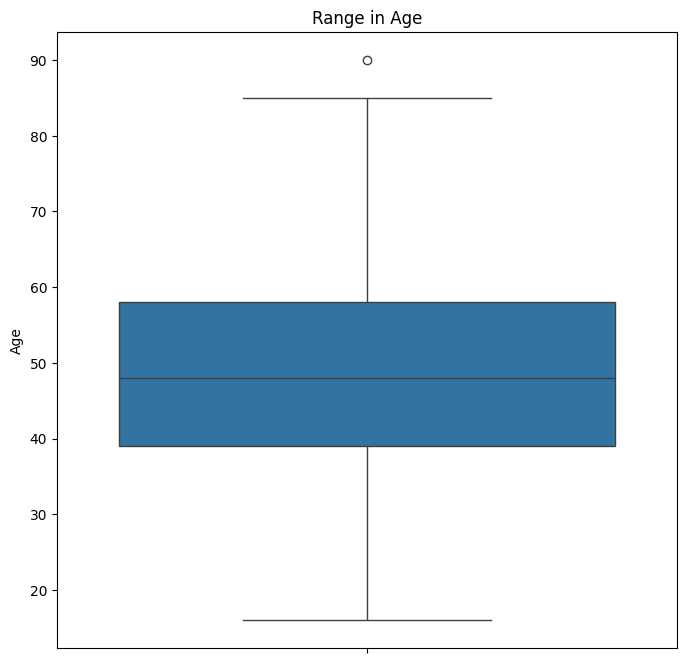

In [16]:
plt.figure(figsize=(8, 8))
plt.title('Range in Age')
sns.boxplot(df_clean['Age'])
plt.show()

In [17]:
print('skewness in Age')
float(df['Age'].skew())

skewness in Age


0.3293593578272701

In [18]:
def zscores(data):
    z = (data - data.mean()) / data.std()
    outliers = z[(z < -3) | (z > 3)]
    return outliers

outliers = zscores(df_clean['Age'])
print(f'Total outliers in Age: {len(outliers)}')

Total outliers in Age: 1


In [19]:
def iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data < lower) | (data > upper)]
    return outliers

outliers = iqr(df_clean['Age'])
print(f'Total outliers in Age: {len(outliers)}')

Total outliers in Age: 1


there are only one outlier, we're going to let it be

## Bivariate Analysis

- Hypoteses 1: Polyuria is from frequent, have higher potesin to diabetes
- Hypotesis 2: if someone Obesity, have higher potesi to diabetes
- Hypotesis 3: Older people have more potential have diabetes

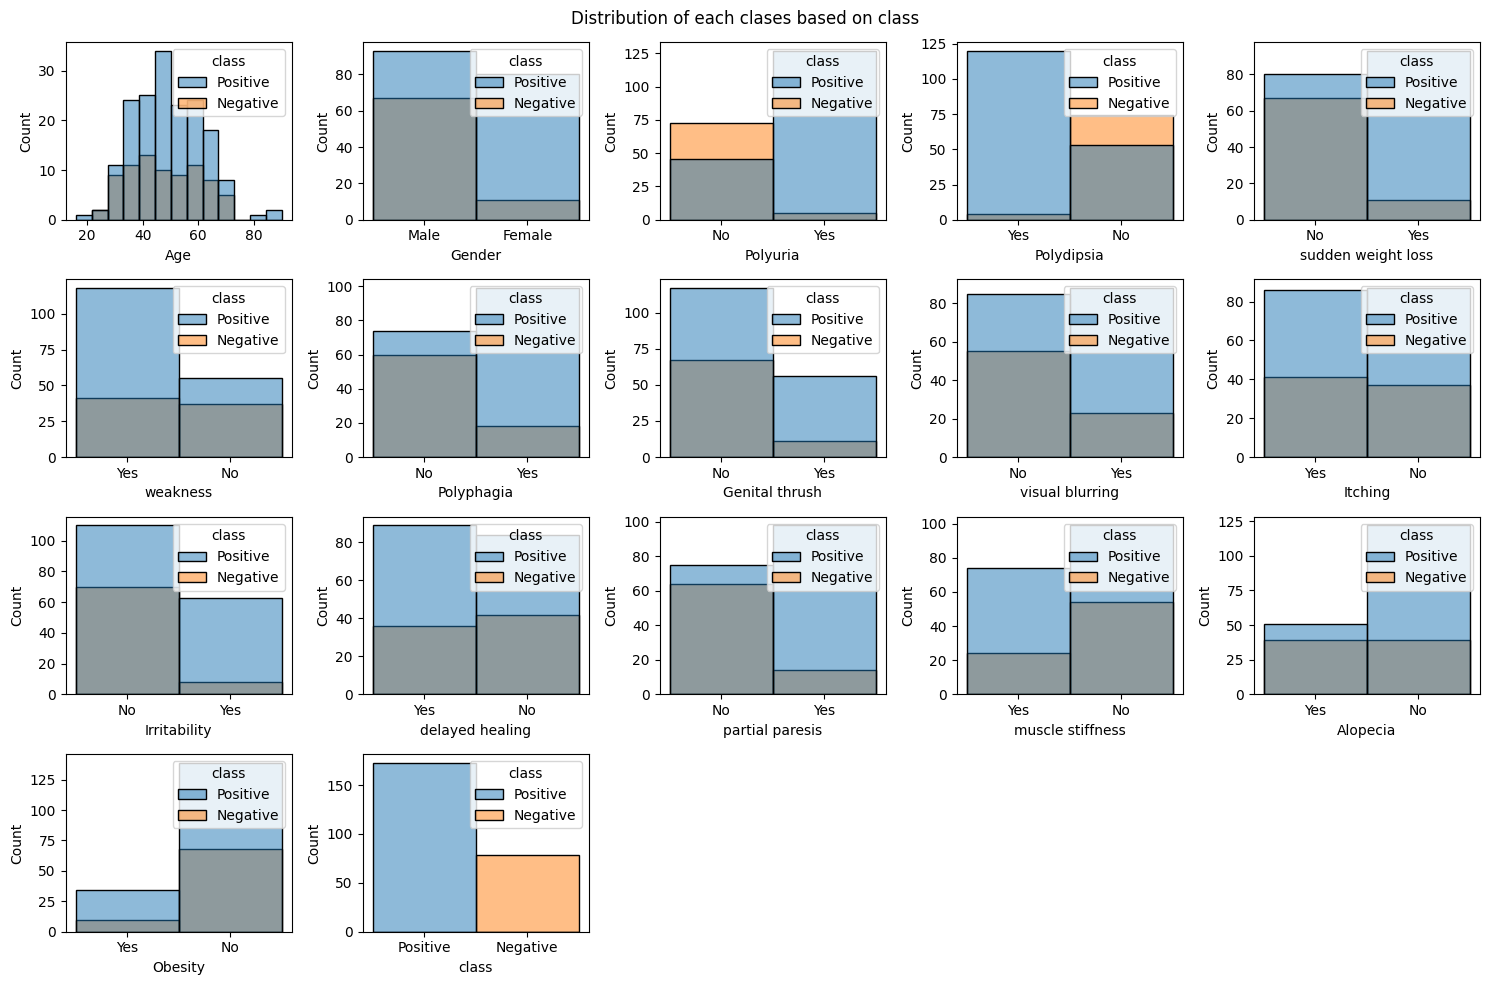

In [20]:
for i, col in enumerate(df_clean):
    plt.subplot(4, 5, i+1)
    sns.histplot(x=df_clean[col], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class")
plt.tight_layout()
plt.show()

- Age have good distribution, while gender 
- Because this dataset of diabetes, di class positive is quite more big than negative
- 

In [21]:
# for i, col in enumerate(df_clean.drop('Age', axis=1).columns):
#     plt.subplot(4, 5, i+1)
#     sns.boxplot(x=df_clean[col], y=df_clean['Age'], hue=df_clean['class'])

# plt.suptitle("Distribution of each clases based on class based on age")
# plt.tight_layout()
# plt.show()

## Intersting characteristic 
- `Class` to `age` have sligtly equel `positive` or `negative`, but Positive class have more range and with outliers for higher age
- `Muscle stifness` have a similar tren with `ithcing` and `alopecia`, `delayed` `healing`,
- while `Polyphagia`, `visual blurring`, `polyuria` have inverse with perivous, that `Negative` Yes is more higher


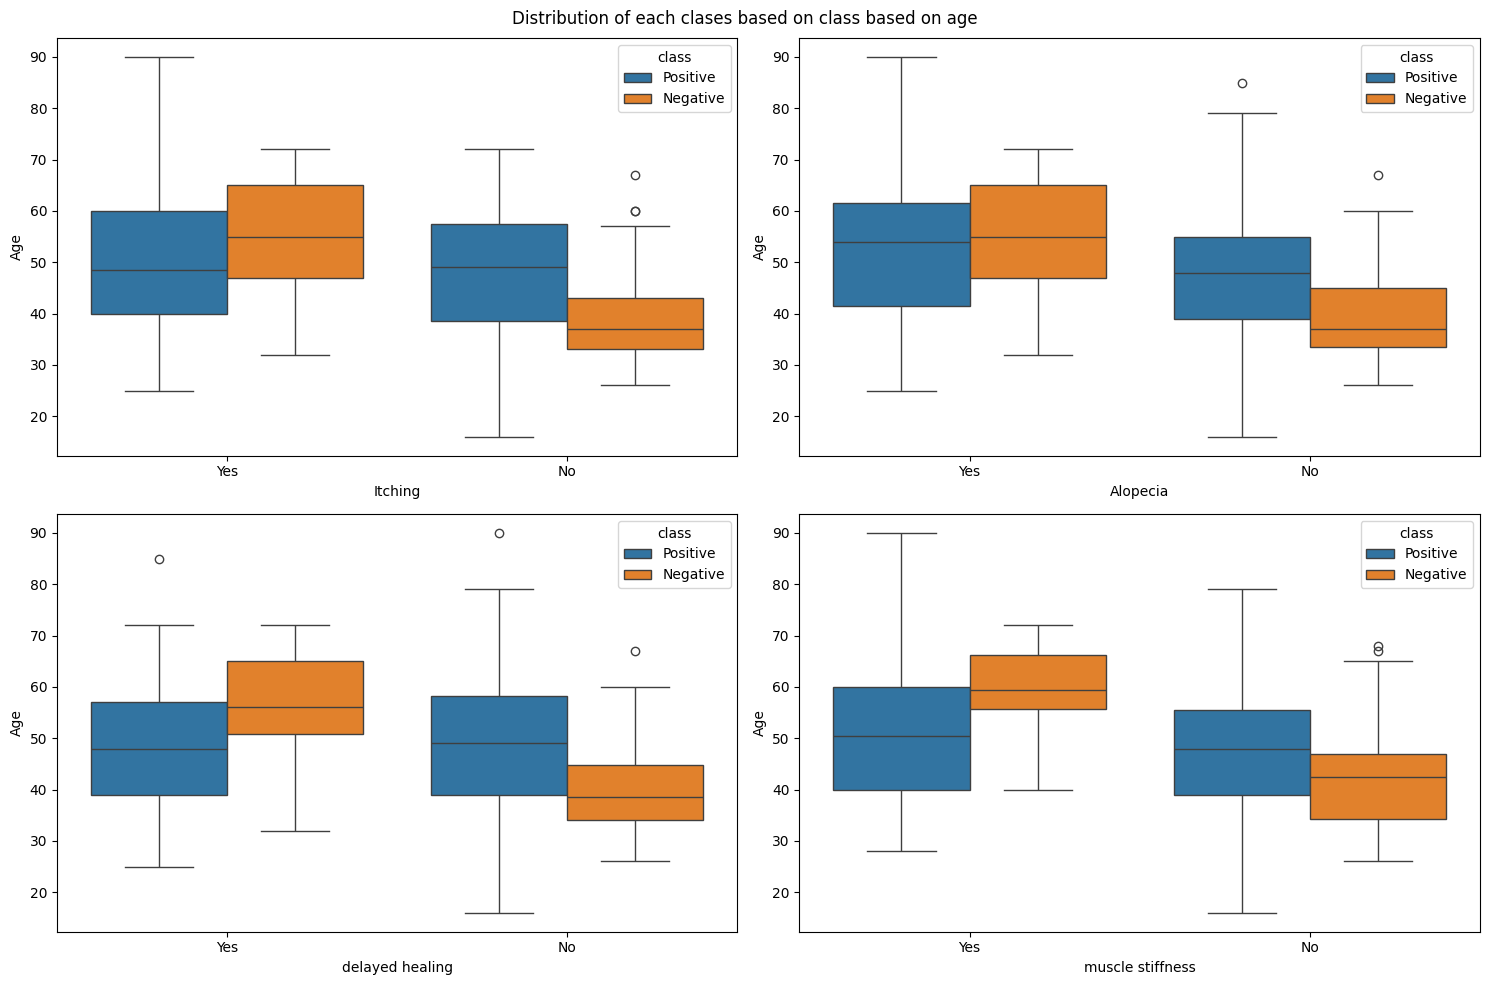

In [22]:
for i, col in enumerate(df_clean[['Itching', 'Alopecia', 'delayed healing', 'muscle stiffness']]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_clean[col], y=df_clean['Age'], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()

## Interpratation
- Age with lower No complication is dont have diabetes, it mean the more young people with no complication is more safe from diabetes, while pople with diabetes range of productive people

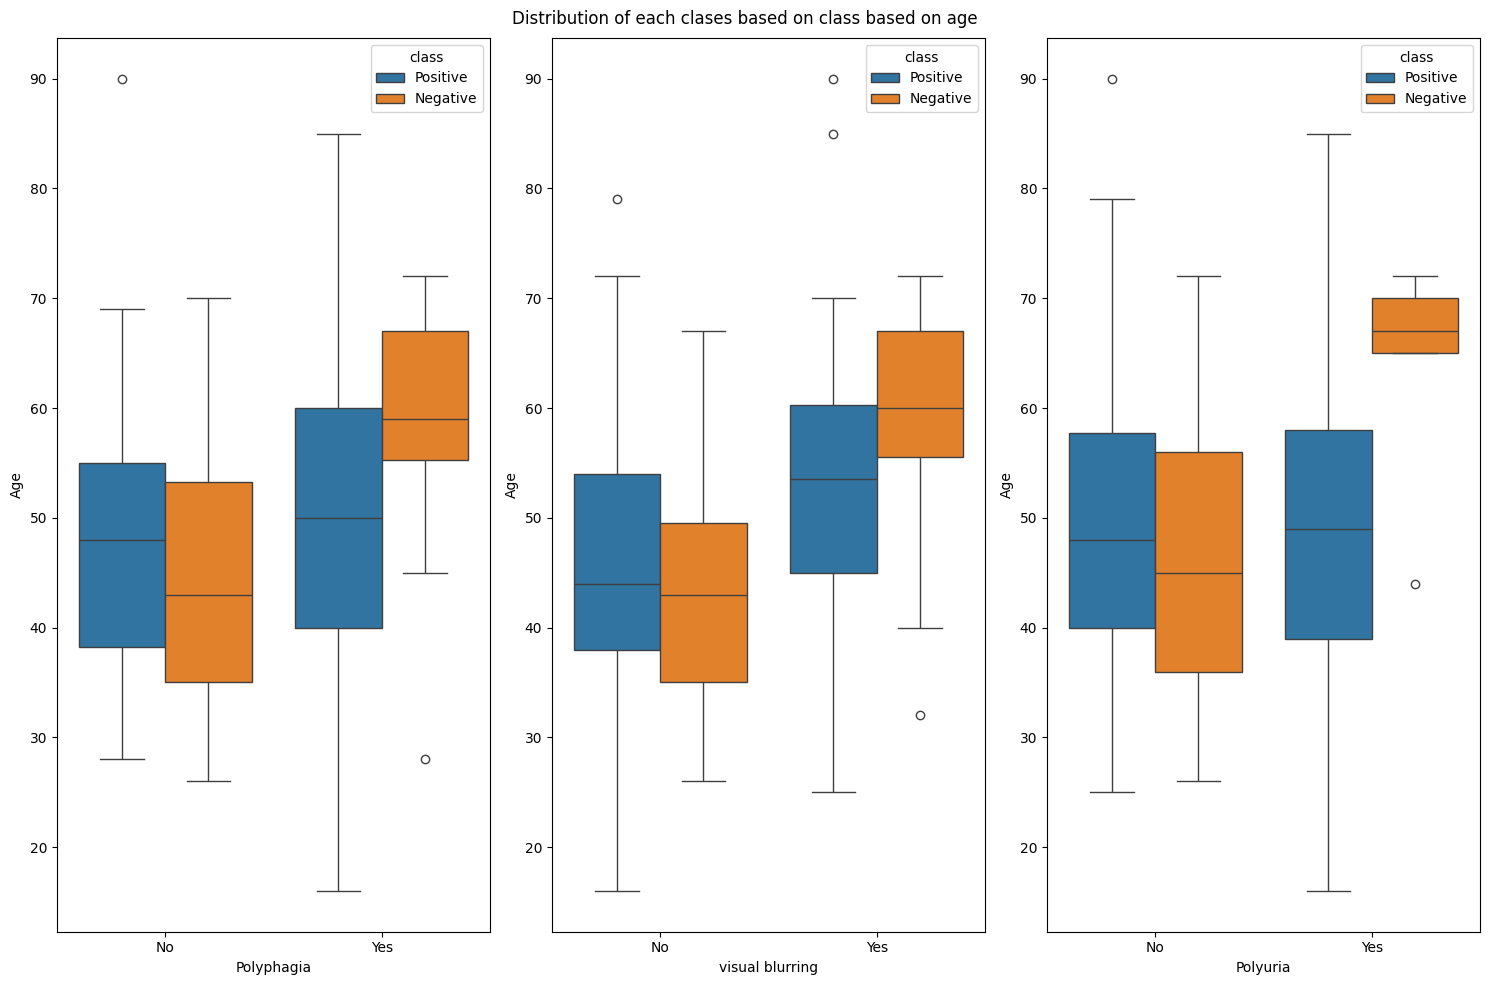

In [23]:
for i, col in enumerate(df_clean[['Polyphagia', 'visual blurring', 'Polyuria']]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_clean[col], y=df_clean['Age'], hue=df_clean['class'])

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()

## Interpratation 
- while `Polyphagia`, `visual blurring`, `polyuria` have inverse with perivous, that `Negative` Yes is more higher
It means: people with that complication wtih higher age, is have less potential to diabetes

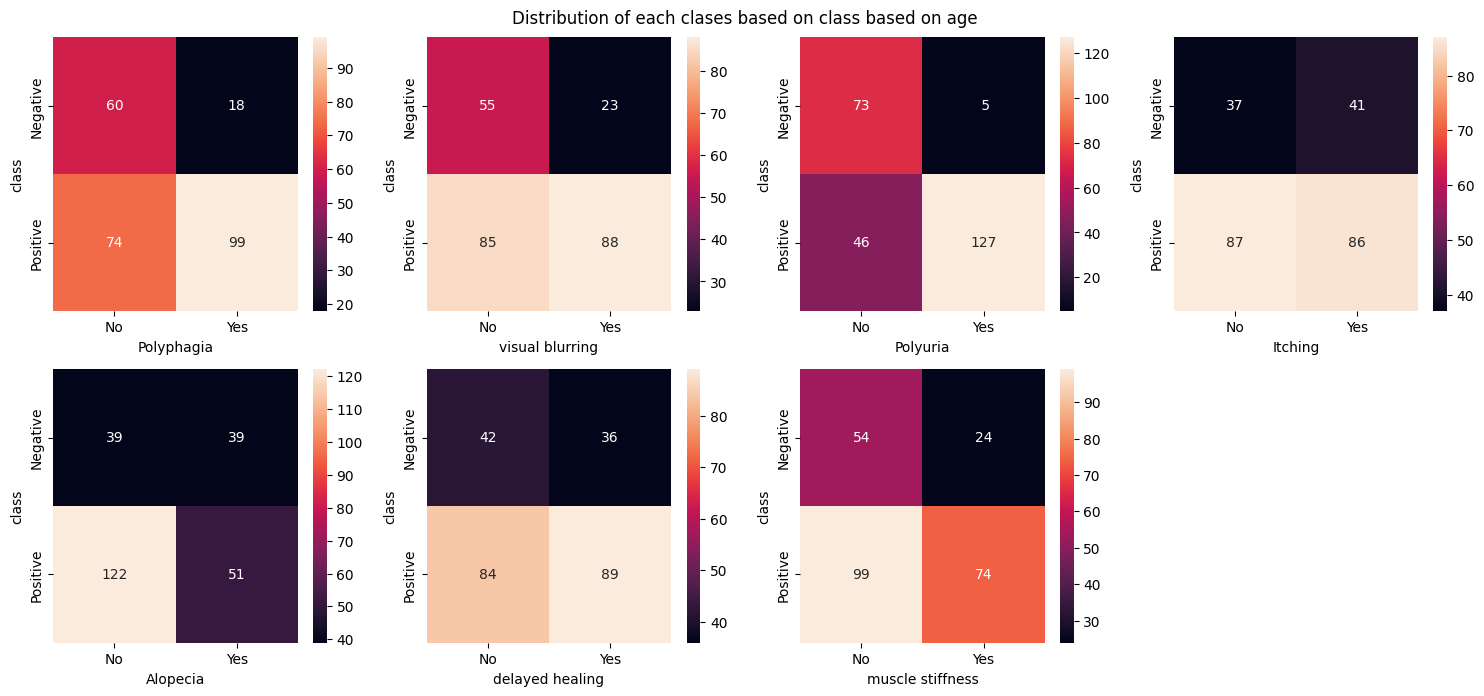

In [24]:

for i, col in enumerate(df_clean[['Polyphagia', 'visual blurring', 'Polyuria', 'Itching', 'Alopecia', 'delayed healing', 'muscle stiffness']]):
    plt.subplot(3, 4, i+1)
    sns.heatmap(pd.crosstab(df_clean['class'], df_clean[col],), annot=True, fmt='2')

plt.suptitle("Distribution of each clases based on class based on age")
plt.tight_layout()
plt.show()


## Interpratation 
- Muscle stifness, Aleponica ,Most of  No Positive 
- Plyuria, polypahiga, visual blurring More in Yes positive
- itching and delayed healing hard to inteprete, that Postive Yes and No, Negative Yes No have simmilar distribution

## Conclusion:
- Column of `Polyphagia`, `visual blurring`, `Polyuria`, `Itching`, `Alopecia`, `delayed healing`, `muscle stiffness` have ad diver characteris that we can determine 
- Diabetes pepole dominated in productive people
- Muscle stifness, Aleponica , Most of  No Positive 
- Plyuria, polypahiga, visual blurring More in Yes positive

- Hypoteses 1: Polyuria is from frequent, have higher potesin to diabetes (No)
- Hypotesis 2: if someone Obesity, more potensial (No)
- Hypotesis 3: Older people have more potential have diabetes (No)

## Encoding

we're going to do encoding so that the categorical can be used as threshold in the model

In [25]:
def encoding(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes 
    return df 

object_cols = df_clean.select_dtypes(include='object').columns
df_clean = encoding(df_clean, object_cols)
df_clean.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [26]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Non linearity (using spearman)')

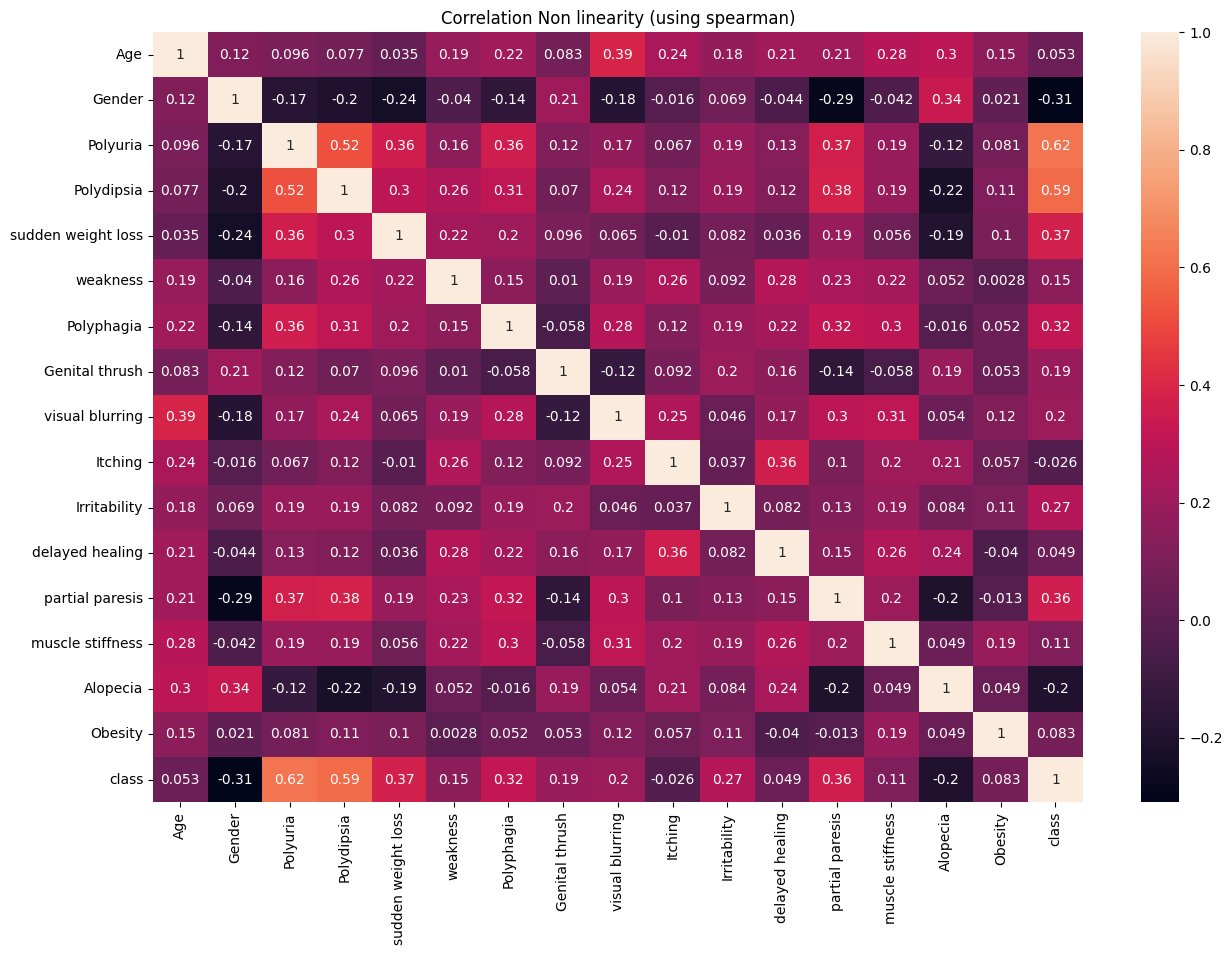

In [27]:
sns.heatmap(df_clean.corr(method='spearman'), annot=True)
plt.title('Correlation Non linearity (using spearman)')

there are some features which has almost strong corr with class (ordinal) `Polyuria` and `Polydispia`

## Feature Selection (Using Mutual Information)

In [28]:
bins = int(np.log(len(df_clean)))
print(f'Groups we can have for age: {bins}')

Groups we can have for age: 5


In [29]:
def mutual_information(crosstab):
    observed = np.array(crosstab.iloc[:-1, :-1])
    ratio = observed / np.sum(observed)
    Px = np.sum(ratio, axis=1, keepdims=True)
    Py = np.sum(ratio, axis=0, keepdims=True)
    nonzero = ratio > 0
    MI = np.sum(ratio[nonzero] * np.log(ratio[nonzero] / (Px @ Py)[nonzero]))
    return MI 

In [30]:
Age = np.array(df_clean['Age'])
X = np.digitize(Age, bins=np.linspace(Age.min(), Age.max(), bins + 1))
X_df = pd.DataFrame(X.T)
Age_crosstab = pd.crosstab(X_df[0], df_clean['class'], margins=True)
Age_mi = float(mutual_information(Age_crosstab))
print(f'Mutual info in Age: {Age_mi}')

Mutual info in Age: 0.010661511089825907


In [31]:
MIs = []
for col in object_cols:
    crosstab = pd.crosstab(df_clean[col], df_clean['class'], margins=True)
    MI = mutual_information(crosstab)
    MIs.append(MI)
    print(f'{col}: {MI}')

Gender: 0.05264966135007289
Polyuria: 0.2186469996623243
Polydipsia: 0.20553686920559475
sudden weight loss: 0.0761786723591115
weakness: 0.011116193339014289
Polyphagia: 0.05245465045141124
Genital thrush: 0.019795486236686817
visual blurring: 0.020353986100069957
Itching: 0.0003488867743886041
Irritability: 0.04089233561246508
delayed healing: 0.0012002777482875357
partial paresis: 0.06946591424911969
muscle stiffness: 0.006606577739719635
Alopecia: 0.019236906073552877
Obesity: 0.0036228235771726507
class: 0.6197049935943181


In [32]:
print('==Top Feature as predictors==')
np.array(object_cols)[np.argsort(MIs)[::-1]].tolist()

==Top Feature as predictors==


['class',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'partial paresis',
 'Gender',
 'Polyphagia',
 'Irritability',
 'visual blurring',
 'Genital thrush',
 'Alopecia',
 'weakness',
 'muscle stiffness',
 'Obesity',
 'delayed healing',
 'Itching']

## Cross Validation (all possible combos)

In [33]:
def accuracy_score(y_pred, y_test):
    return np.mean(y_pred == y_test) * 100

def cross_validation(X, y, model, k=5, prune=False, alpha=0.0, train_pred=False):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []
    train_accuracies = []

    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k -1 else n_samples
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train , y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train.reshape(-1, 1))

        if prune =='REP':
            model.reduced_error_pruning(X_test, y_test, model.root)
        elif prune == 'CCP':
            model.cost_complexity_pruning(alpha, model.root)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_pred, y_test)
        accuracies.append(accuracy)

        y_pred_train = model.predict(X_train)
        train_accuracy = accuracy_score(y_pred_train, y_train)
        train_accuracies.append(train_accuracy)


    data = {
        'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test,
        'y_pred': y_pred, 'accuracies': accuracies, 'test_indices': test_indices, 'train_indices': train_indices
    }

    if train_pred == True:
        data['train_accuracies'] = train_accuracies

    return data


## Modelling

In [34]:
from collections import Counter

In [35]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, sample=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left 
        self.right = right
        self.info_gain = info_gain
        self.value = value
        self.sample = sample

In [36]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_sample_split=2, min_sample_leaf=1, features=None, mode='gini'):
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.min_sample_leaf = min_sample_leaf
        self.features = features
        self.mode = mode

        self.root = None
        self.feature_importance = None



    """RECURSIVE FUNCTION"""
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape 

        features = np.arange(n_features)
        if self.features != None:
            features = self.features 

        if n_samples>=self.min_sample_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, n_samples, features)

            if best_split['info_gain']>0 and len(best_split["dataset_left"])>self.min_sample_leaf and len(best_split["dataset_right"])>self.min_sample_leaf:
                feature_index = best_split['feature_index']

                self.feature_importance[0][feature_index] += best_split['info_gain']
                self.feature_importance[1][feature_index] += 1

                """recursive concept is here!!"""
                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth+1)
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth+1)
                return Node(
                    feature_index=feature_index,
                    threshold=best_split['threshold'],
                    left = left_subtree,
                    right=right_subtree,
                    info_gain = best_split['info_gain'],
                    sample=Y 
                )
            
        leaf_value = self.calc_leaf_value(Y)
        return Node(value=leaf_value, sample=Y)
    
    def get_best_split(self, dataset, n_samples, features):
        best_split = {}
        max_info_gain = -float('inf')

        for feature_index in features:
            possible_threshold = np.unique(dataset[:, feature_index])
            for threshold in possible_threshold:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)

                    if curr_info_gain > max_info_gain:
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'dataset_left': dataset_left, 
                            'dataset_right': dataset_right,
                            'info_gain': curr_info_gain
                        }
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def calc_leaf_value(self, Y):
        Y = list(Y)
        Y = [float(y) for y in Y]
        return max(Y, key=Y.count)
    



    """INFORMATION GAIN FUNCTIONS"""
    def information_gain(self, parent, l_child, r_child, mode):
        l_weight = len(l_child) / len(parent)
        r_weight = len(r_child) / len(parent)
        gain = 0
        if mode == 'gini':
            gain = self.gini(parent) - (l_weight*self.gini(l_child) +  r_weight*self.gini(r_child))
        elif mode == 'entropy':
            gain = self.entropy(parent) - (l_weight*self.entropy(l_child) +  r_weight*self.entropy(r_child))
        return gain

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini
    





    """POST PRUNING"""
    def reduced_error_pruning(self, X_test, y_test, tree=None):
        if tree.left and tree.right:
            self.reduced_error_pruning(X_test, y_test, tree.left)
            self.reduced_error_pruning(X_test, y_test, tree.right)

            if tree.left.value != None and tree.right.value != None:
                accuracy_before = np.mean(self.predict(X_test) == y_test)
                tree.value = self.calc_leaf_value(y_test)
                accuracy_pruned = np.mean(self.predict(X_test) == y_test)

                """comprehsnding accuracy before and after"""
                if accuracy_pruned >= accuracy_before:
                    tree.left = None 
                    tree.right = None
                else:
                    tree.value = None 

    def cost_complexity_pruning(self, alpha=0.01, tree=None):
        if tree is None:
            tree = self.root 

        if tree.left and tree.right:
            self.cost_complexity_pruning(alpha, tree.left)
            self.cost_complexity_pruning(alpha, tree.right)

            left_cost = self._calc_subtree_cost(tree.left)
            right_cost = self._calc_subtree_cost(tree.right)

            if (left_cost + right_cost - 1) * alpha >= tree.info_gain:
                tree.value = self.calc_leaf_value([leaf.value for leaf in self._get_leaves(tree)])
                tree.left = tree.right = None 
        return tree

    def _get_leaves(self, tree=None):
        if tree.value is not None:
            return [tree]
        return self._get_leaves(tree.left) + self._get_leaves(tree.right)
    
    def _calc_subtree_cost(self, tree=None):
        if tree is None:
            return 0

        if tree.value is not None:
            y = np.array(tree.sample)
            if self.mode == 'gini':
                return self.gini(y)
            else:
                return self.entropy(y)
            
        left_cost = self._calc_subtree_cost(tree.left)
        right_cost = self._calc_subtree_cost(tree.right)
        return left_cost + right_cost + 1    





    """FIT AND PREDICT"""
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.feature_importance = np.zeros([2, X.shape[1]])
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_predictions(x, self.root) for x in X]
        return predictions

    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value 
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
        





    """GET LEAF INFO"""
    def get_leaf_info(self, x, tree=None, node_id=0):
        if tree is None:
            tree = self.root 

        if tree.value is not None:
            count = dict(Counter(tree.sample))
            ratio = {k: round(v/sum(count), 2) for k, v in count.items()}
            return [node_id, ratio]
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.get_leaf_info(x, tree.left, node_id * 2 + 1)
        else:
            return self.get_leaf_info(x, tree.right, node_id * 2 + 1)
        
    def get_all_leaf_info(self, tree=None, node_id=0, leaf_info=None):
        if leaf_info is None:
            leaf_info = {}

        if tree is None:
            tree = self.root

        if tree.value is not None:
            count = dict(Counter(tree.sample))
            leaf_info[node_id] = count 
            return leaf_info

        self.get_all_leaf_info(tree.left, node_id * 2 + 1, leaf_info)
        self.get_all_leaf_info(tree.right, node_id * 2 + 2, leaf_info)
        return leaf_info
    
    def print_tree(self, tree=None, depth=0):
        if tree is not None:
            tree = self.root 
            
        if tree.value is not None:
            print(f'{"  " * depth} leaf: class {int(tree.value)} | {dict(Counter(tree.sample))} | depth: {depth}')
            return 
        
        print(f'{"  " * depth} feature {int(tree.feature_index)} <= {tree.threshold} | info gain: {tree.info_gain} | depth: {depth}')
        self.print_tree(tree.left, depth+1)
        self.print_tree(tree.right, depth+1)


# Tree Visualization

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, deque
from matplotlib.patches import Patch, ConnectionPatch

class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.palette = self._create_color_palette()
        self.node_cache = {}
        self._cache_nodes(tree.root)
        
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))
    
    def _calculate_impurity(self, y):
        return self._calculate_gini(y) if self.mode == 'gini' else self._calculate_entropy(y)
    
    def _calculate_entropy(self, y):
        total = len(y)
        return -sum((c/total)*np.log2(c/total) for c in Counter(y).values())
        
    def _calculate_gini(self, y):
        total = len(y)
        return 1 - sum((c/total)**2 for c in Counter(y).values())
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node, 'left', None):
                queue.extend([node.left, node.right])
    
    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f"{feature_val:.2f}" if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "≤" if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(8,8))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()
    
        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}
    
        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1 - level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos
    
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes")
    
        if x is not None:
            title = (f"Decision Tree Path - Step {step} of {len(decisions)}"
                     if step is not None else f"Complete Decision Path\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        fig.suptitle(title, fontsize=12)
        return fig, ax
    
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f"Class {node.value}\n" + "\n".join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}"
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center',
                bbox=dict(boxstyle="round", fc=(*bg_color, 0.3), ec=edge_color, linewidth=lw),
                fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        edge_color, lw = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple="stack", ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=edge_color, linestyle='--', linewidth=lw)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f"{self.feature_names[node.feature_index]} <= {thresh_str}\n" +
                 " ".join(f"{k}:{v}" for k, v in dist.items()) +
                 f"\n{'Gini' if self.mode=='gini' else 'Entropy'}: {self._calculate_impurity(node.sample):.3f}")
        ax.set_title(title, fontsize=8, color=edge_color, y=0.8)
    
    def _draw_connections(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1] + c_box[3]),
                              coordsA="figure fraction", coordsB="figure fraction",
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width)
        main_ax.add_artist(con)


## SPLITTING

In [38]:
df_clean['class'].value_counts()

class
1    173
0     78
Name: count, dtype: int64

In [39]:
target_col = 'class'
feature_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

In [40]:
X = df_clean[feature_names].values
Y = df_clean[target_col].values

In [41]:
model = DecisionTreeClassifier()
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0.0)

test = data['test_indices']
train = data['train_indices']

In [42]:
print(f'Test Size: {round(len(test) / len(df_clean) * 100)}%')
print(f'Train Size: {round(len(train) / len(df_clean) * 100)}%')

Test Size: 20%
Train Size: 80%


## `Scenario 1`: Minimum Limitations 

In [43]:
plt.rcParams['figure.figsize'] = (12, 5)

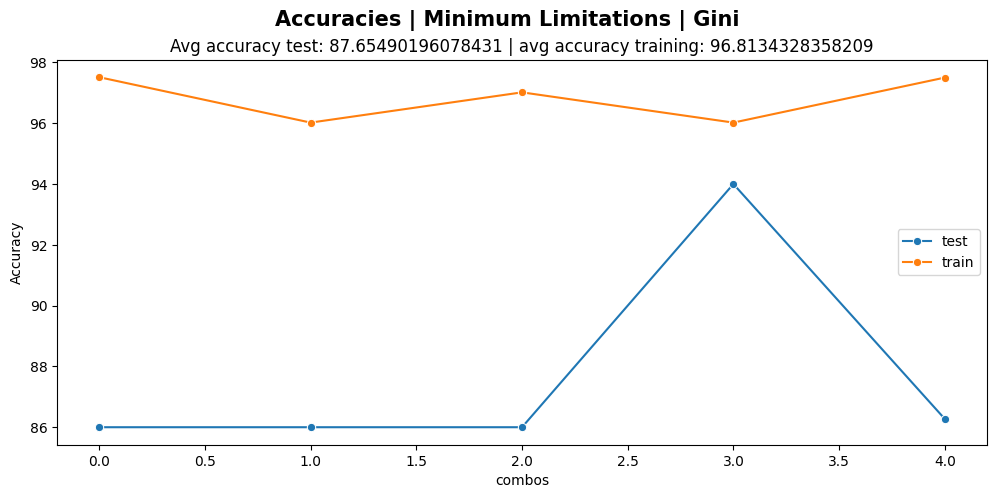

In [44]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='gini')
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0.0, train_pred=True)
avg_accuracy = np.mean(data['accuracies'])
avg_accuracy_training = np.mean(data['train_accuracies'])

sns.lineplot(data['accuracies'], marker='o',  legend=True, label='test')
sns.lineplot(data['train_accuracies'], marker='o',  legend=True, label='train')
plt.suptitle('Accuracies | Minimum Limitations | Gini', size=15, weight='bold')
plt.title(f'Avg accuracy test: {avg_accuracy} | avg accuracy training: {avg_accuracy_training}')
plt.xlabel(f'combos')
plt.ylabel('Accuracy')
plt.show()

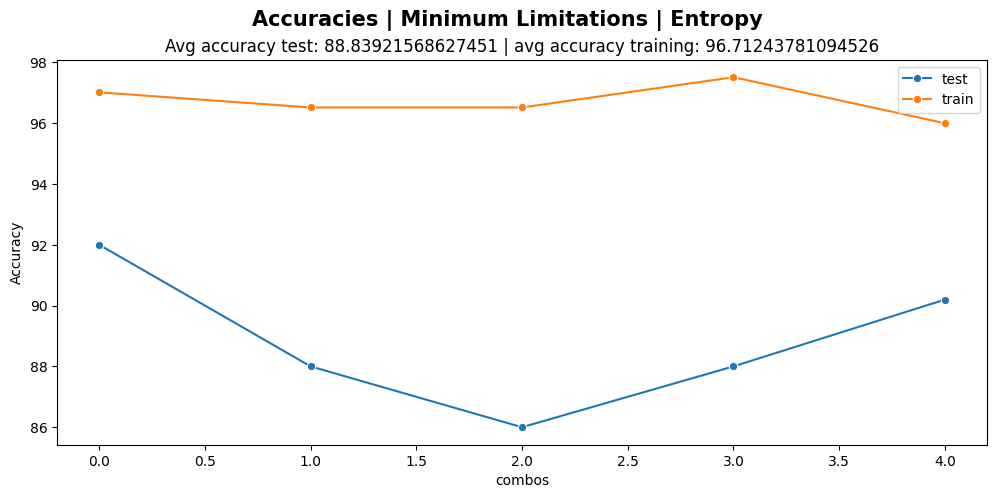

In [45]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0.0, train_pred=True)
avg_accuracy = np.mean(data['accuracies'])
avg_accuracy_training = np.mean(data['train_accuracies'])

sns.lineplot(data['accuracies'], marker='o', legend=True, label='test')
sns.lineplot(data['train_accuracies'], marker='o', legend=True, label='train')
plt.suptitle('Accuracies | Minimum Limitations | Entropy', size=15, weight='bold')
plt.title(f'Avg accuracy test: {avg_accuracy} | avg accuracy training: {avg_accuracy_training}')
plt.xlabel(f'combos')
plt.ylabel('Accuracy')
plt.show()

In [46]:
for key, val in model.get_all_leaf_info().items():
    val_reformat = {int(k): v for k, v in val.items()}
    print(f'node id {key}: {val_reformat}')

node id 31: {0: 5, 1: 2}
node id 32: {1: 8}
node id 16: {0: 4, 1: 1}
node id 143: {0: 22}
node id 144: {0: 2, 1: 1}
node id 145: {0: 2, 1: 1}
node id 146: {1: 2}
node id 36: {0: 19}
node id 75: {0: 3}
node id 76: {1: 1, 0: 1}
node id 38: {1: 4}
node id 9: {1: 12}
node id 21: {1: 4}
node id 45: {0: 2}
node id 93: {1: 2}
node id 94: {0: 2, 1: 1}
node id 11: {1: 10}
node id 25: {0: 2}
node id 53: {1: 1, 0: 1}
node id 54: {1: 5}
node id 6: {1: 80}


no significant difference

(<Figure size 800x800 with 42 Axes>, <Axes: >)

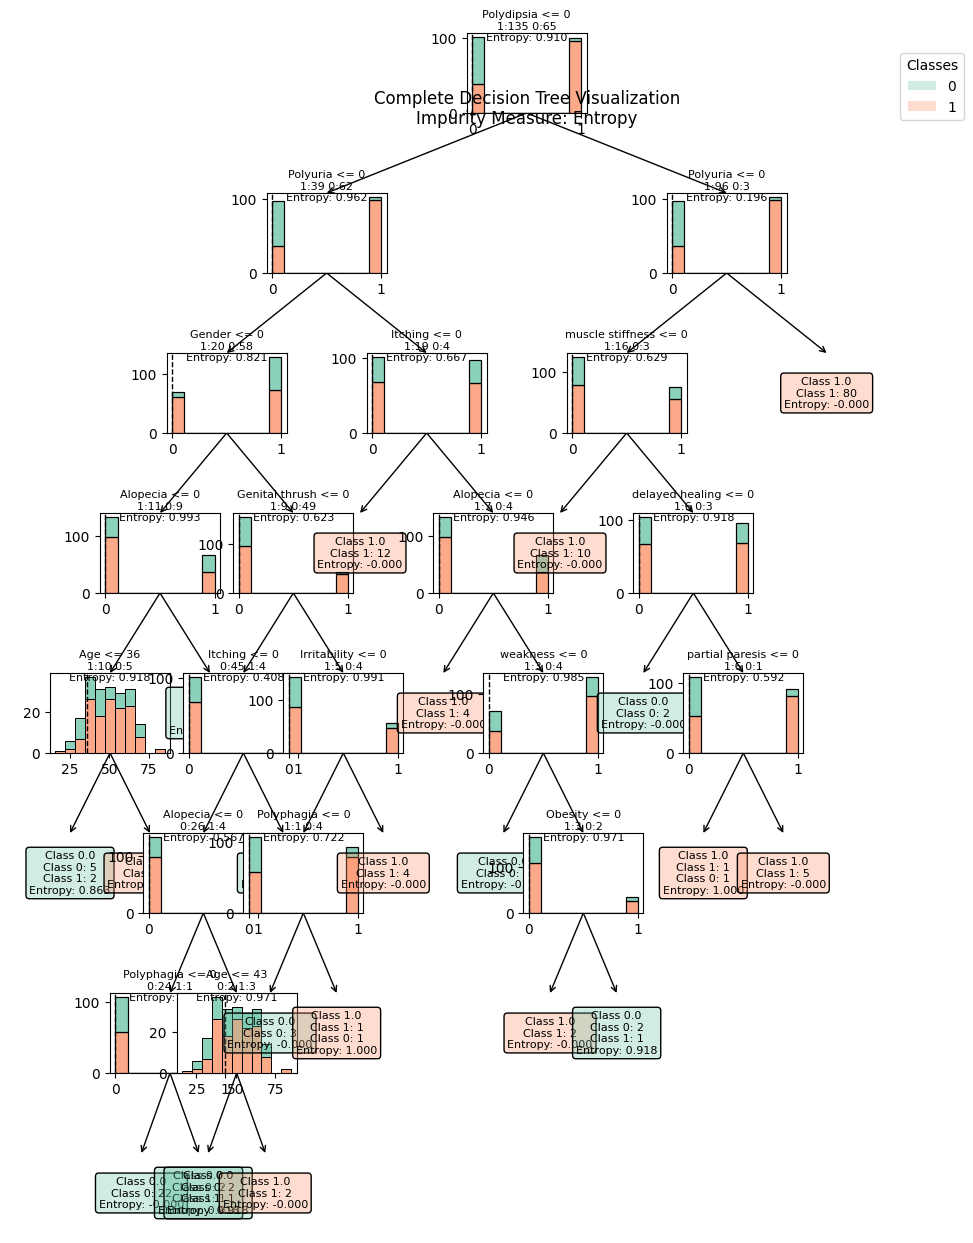

In [47]:
data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model,data_df=data_df, target_col=target_col, feature_names=feature_names)  
viz.plot_prediction_path()

In [48]:
feature_importance = pd.DataFrame(model.feature_importance).T
feature_importance['cols'] = df_clean.columns.tolist()[:-1]
feature_importance.columns = ['info_gain', 'count', 'cols']
feature_importance

,info_gain,count,cols
0,0.935479,2.0,Age
1,0.103739,1.0,Gender
2,0.251355,2.0,Polyuria
3,0.326819,1.0,Polydipsia
4,0.000000,0.0,sudden weight loss
5,0.291692,1.0,weakness
6,0.454025,2.0,Polyphagia
7,0.124236,1.0,Genital thrush
8,0.000000,0.0,visual blurring
9,0.275369,2.0,Itching


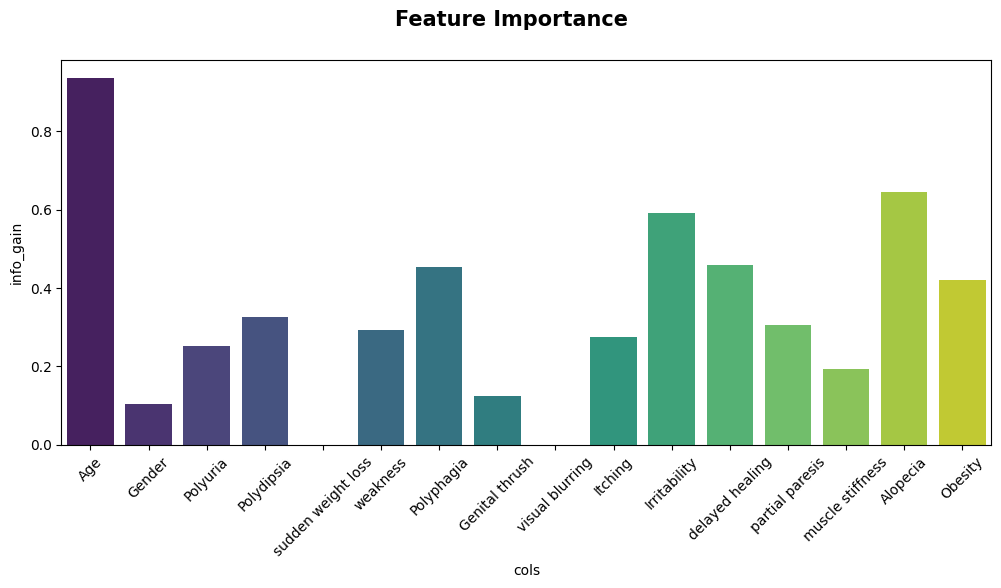

In [49]:
sns.barplot(data=feature_importance, x='cols', y='info_gain', hue='cols', palette='viridis')
plt.suptitle('Feature Importance', size=15, weight='bold')
plt.xticks(rotation=45)
plt.show()

## `Scenario 2`: Cost Complexity Pruning

In [50]:
df_clean['class'].value_counts()

class
1    173
0     78
Name: count, dtype: int64

In [51]:
alphas = np.linspace(0.0001, 0.1, 10)
print(f'Alphas: {alphas}')

Alphas: [0.0001 0.0112 0.0223 0.0334 0.0445 0.0556 0.0667 0.0778 0.0889 0.1   ]


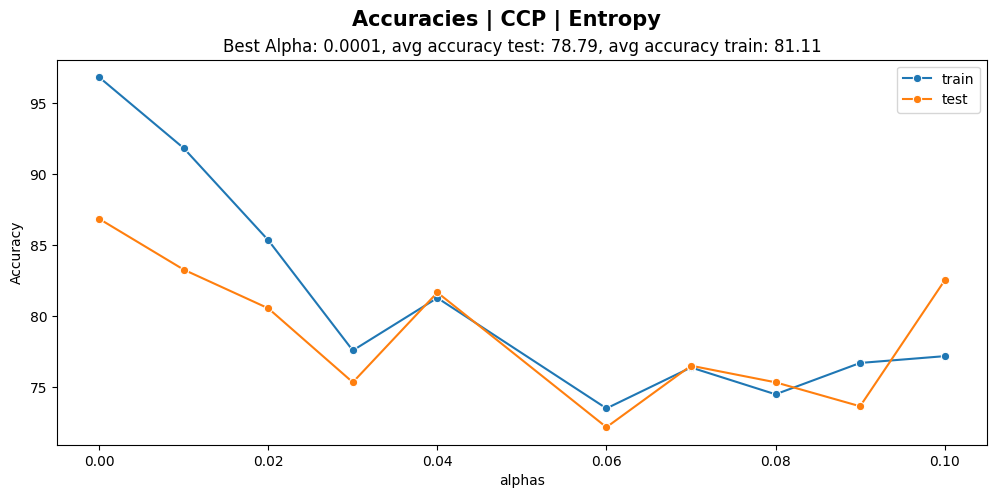

0.0001


In [52]:
accuracies = []
accuracies_train = []
for alpha in alphas:
    model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
    data = cross_validation(X, Y, model, k=5, prune='CCP', alpha=alpha, train_pred=True)
    avg_accuracy = np.mean(data['accuracies'])
    avg_accuracy_train = np.mean(data['train_accuracies'])
    accuracies.append(avg_accuracy)
    accuracies_train.append(avg_accuracy_train)
best_alpha = np.array(alphas)[np.argmax(accuracies)]
avg_accuracy = np.mean(accuracies)
avg_accuracy_train = np.mean(accuracies_train)

accuracies = [float(acc) for acc in accuracies]
alphas = [float(round(alpha, 2)) for alpha in alphas]
sns.lineplot(y=accuracies_train, x=alphas, marker='o', errorbar=None, legend=True, label='train')
sns.lineplot(y=accuracies, x=alphas, marker='o', errorbar=None, legend=True, label='test')
plt.suptitle('Accuracies | CCP | Entropy', size=15, weight='bold')
plt.title(f'Best Alpha: {best_alpha}, avg accuracy test: {round(avg_accuracy,2)}, avg accuracy train: {round(avg_accuracy_train,2)}')
plt.xlabel(f'alphas')
plt.ylabel('Accuracy')
plt.show()
print(best_alpha)

the `bigger` the `alpha`, the more the tree prune not so important subtree. Since the alpha is the lowest in the range, this mean that the tree has become optimal, with most of the child nodes impurity than the parents

(<Figure size 800x800 with 44 Axes>, <Axes: >)

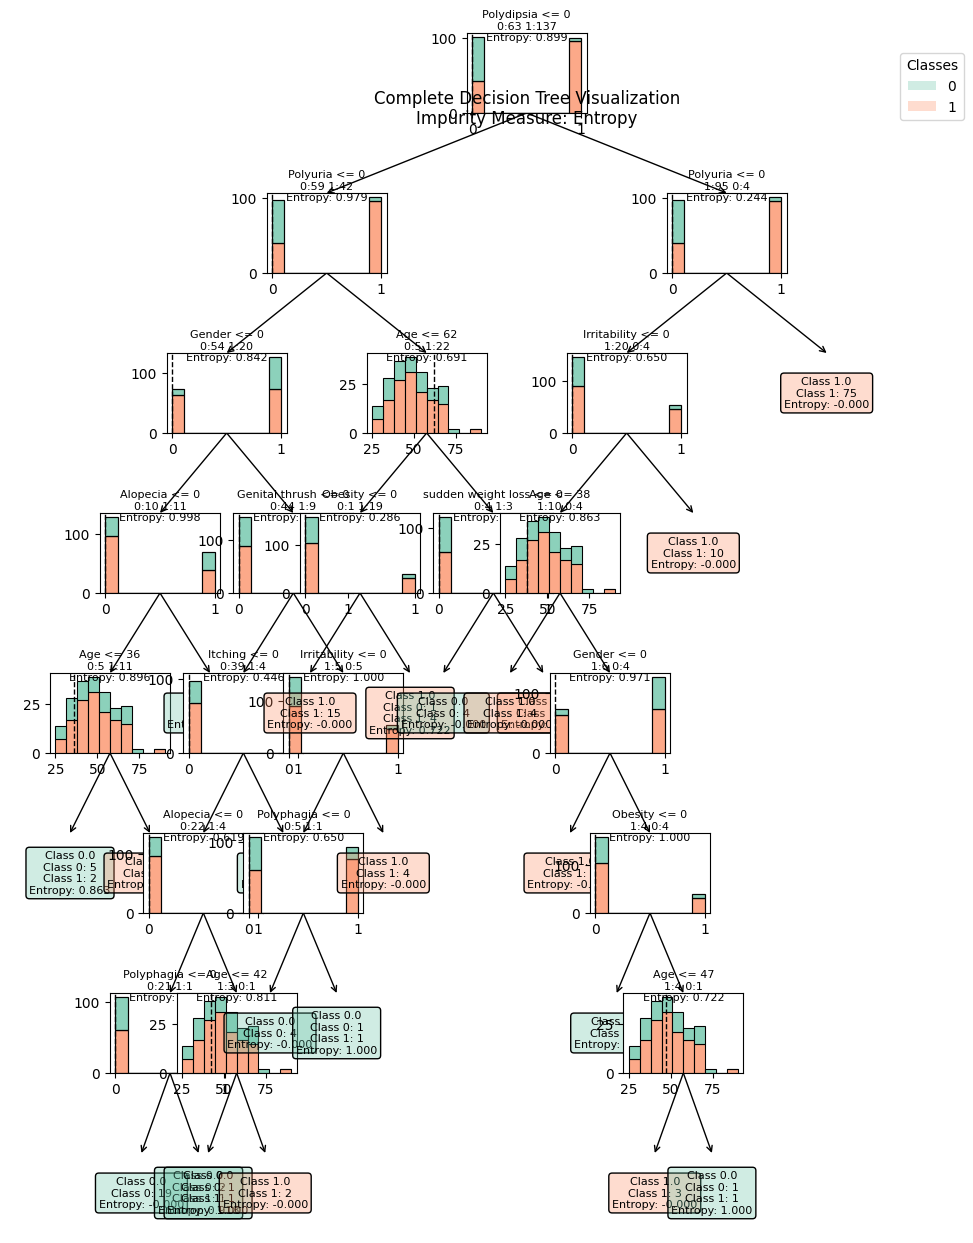

In [53]:
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune='CCP', alpha=best_alpha)

data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model,data_df=data_df, target_col=target_col, feature_names=feature_names)  
viz.plot_prediction_path()

the tree has become optimal, meaning the cost of the `child nodes` are mostly `lower` than the `parent`

## `Scenario 3`: Reduced Error Pruning

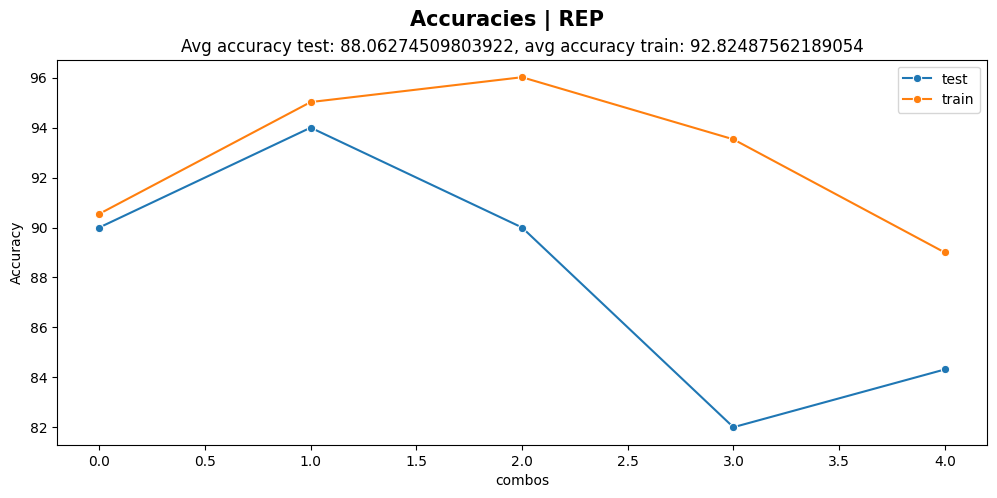

In [54]:

model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune='REP', alpha=alpha, train_pred=True)
avg_accuracy = np.mean(data['accuracies'])
avg_accuracy_train = np.mean(data['train_accuracies'])

sns.lineplot(data['accuracies'], marker='o', legend=True, label='test')
sns.lineplot(data['train_accuracies'], marker='o', legend=True, label='train')
plt.suptitle('Accuracies | REP', size=15, weight='bold')
plt.title(f'Avg accuracy test: {avg_accuracy}, avg accuracy train: {avg_accuracy_train}')
plt.xlabel(f'combos')
plt.ylabel('Accuracy')
plt.show()

better accuracy after reduced error pruning

(<Figure size 800x800 with 18 Axes>, <Axes: >)

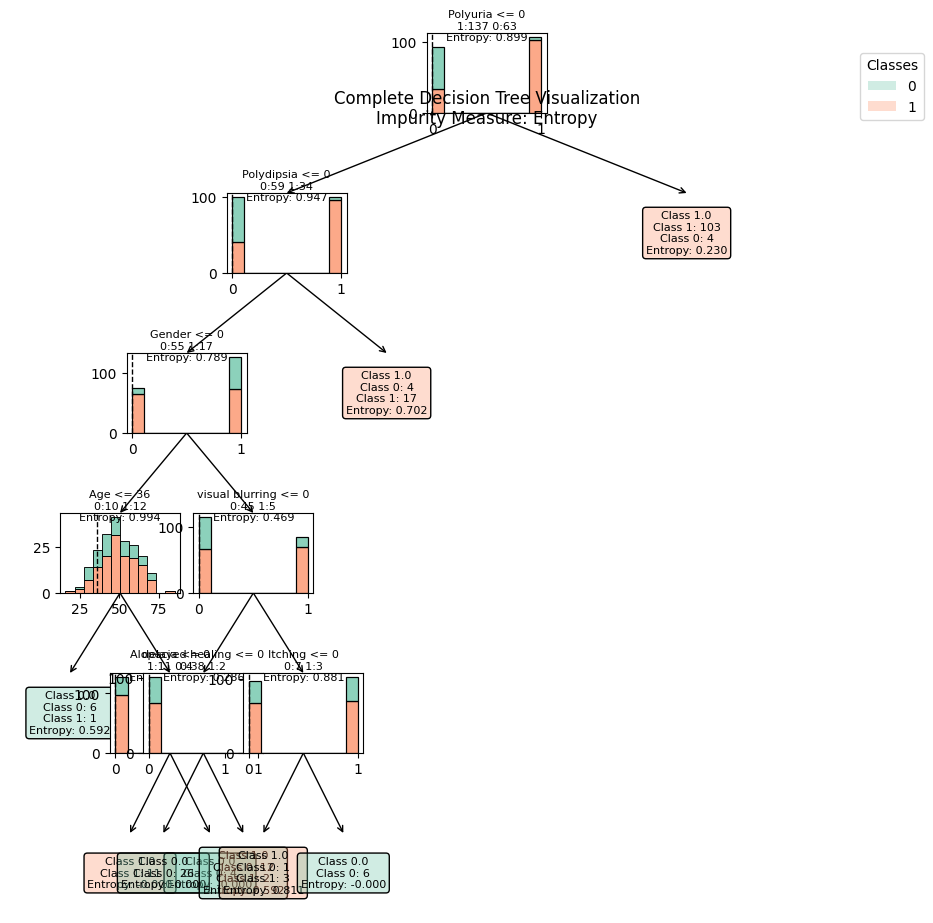

In [55]:
data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model,data_df=data_df, target_col=target_col, feature_names=feature_names)  
viz.plot_prediction_path()

,info_gain,count,cols
0,1.968427,5.0,Age
1,0.159090,1.0,Gender
2,0.335264,1.0,Polyuria
3,0.253476,2.0,Polydipsia
4,1.000000,1.0,sudden weight loss
5,0.000000,0.0,weakness
6,0.000000,0.0,Polyphagia
7,0.000000,0.0,Genital thrush
8,0.063620,1.0,visual blurring
9,0.556780,1.0,Itching


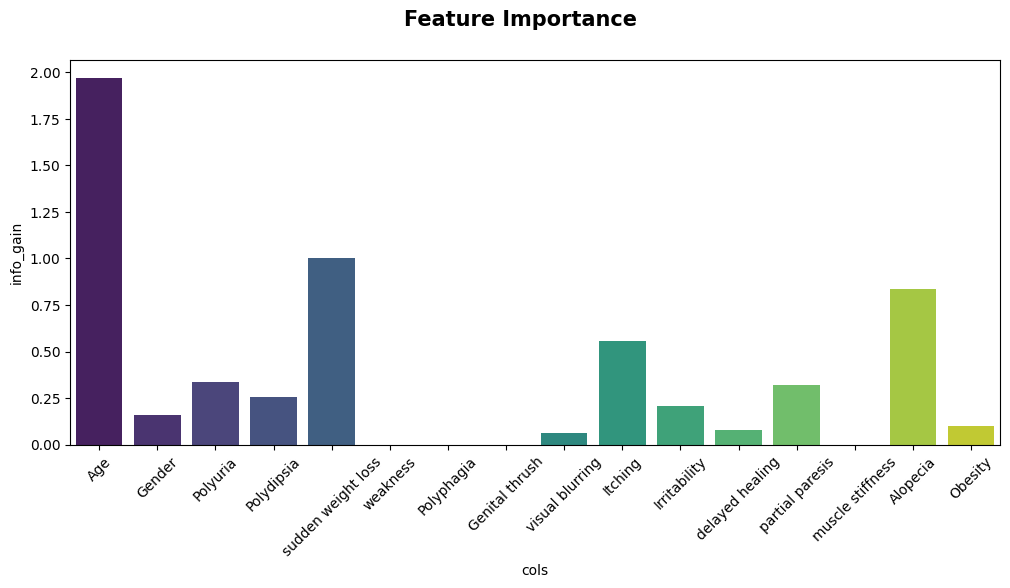

In [56]:
feature_importance = pd.DataFrame(model.feature_importance).T
feature_importance['cols'] = df_clean.columns.tolist()[:-1]
feature_importance.columns = ['info_gain', 'count', 'cols']
display(feature_importance)

sns.barplot(data=feature_importance, x='cols', y='info_gain', hue='cols', palette='viridis')
plt.suptitle('Feature Importance', size=15, weight='bold')
plt.xticks(rotation=45)
plt.show()

## `Scenario 4`: Pre pruning

In [57]:
int(np.log2(6))

2

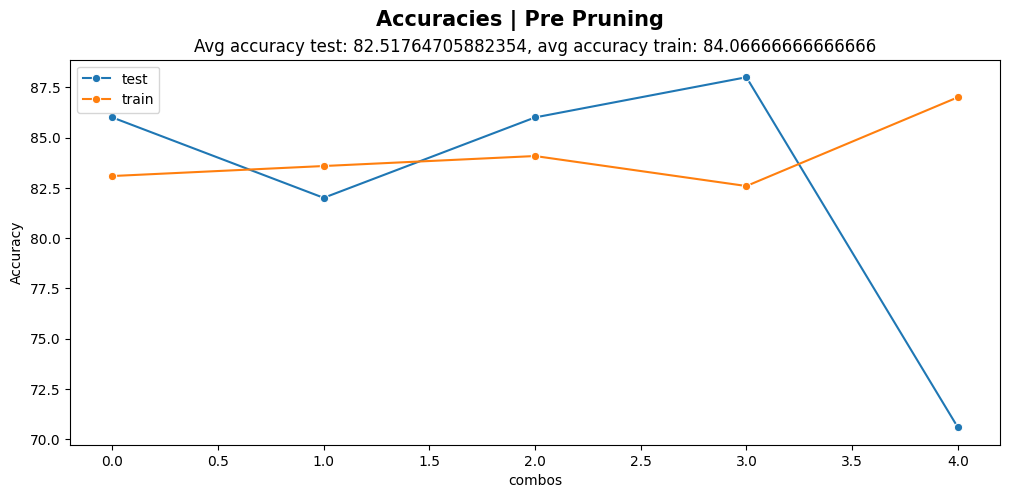

In [58]:
model = DecisionTreeClassifier(max_depth=2, min_sample_split=2, min_sample_leaf=1, features=[0, 2, 4], mode='entropy')
data = cross_validation(X, Y, model, k=5, prune=False, alpha=0.0, train_pred=True)
avg_accuracy = np.mean(data['accuracies'])
avg_accuracy_train = np.mean(data['train_accuracies'])

sns.lineplot(data['accuracies'], marker='o', legend=True, label='test')
sns.lineplot(data['train_accuracies'], marker='o', legend=True, label='train')
plt.suptitle('Accuracies | Pre Pruning', size=15, weight='bold')
plt.title(f'Avg accuracy test: {avg_accuracy}, avg accuracy train: {avg_accuracy_train}')
plt.xlabel(f'combos')
plt.ylabel('Accuracy')
plt.show()

In [59]:
for key, val in model.get_all_leaf_info().items():
    val_reformat = {int(k): v for k, v in val.items()}
    print(f'node id {key}: {val_reformat}')

node id 7: {0: 12, 1: 2}
node id 8: {0: 40, 1: 18}
node id 9: {0: 5, 1: 3}
node id 10: {0: 1, 1: 12}
node id 5: {1: 98}
node id 13: {0: 2, 1: 3}
node id 14: {1: 4}


(<Figure size 800x800 with 14 Axes>, <Axes: >)

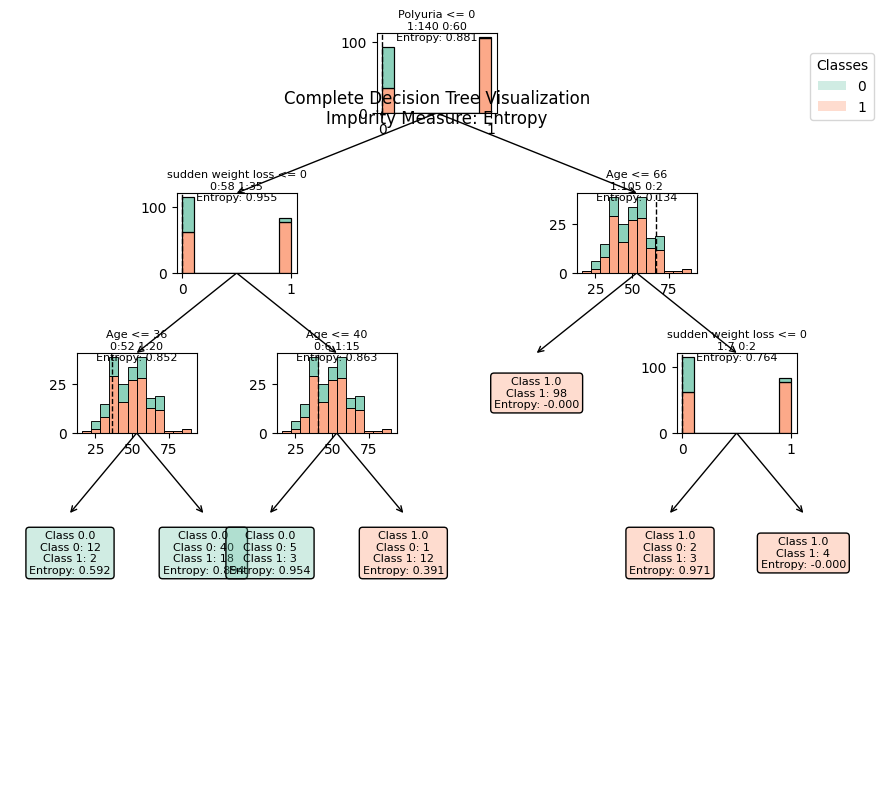

In [60]:
data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model,data_df=data_df, target_col=target_col, feature_names=feature_names)  
viz.plot_prediction_path()

combo of best from Mutual Info + Age

## **Conclusion:**
1. ``Age`` was the most predictor out of all: the reason why is because it has many thresholds, so there are many possibilities that can seperate one group with another    
2. `sudden weight loss`: has reached the highest info gain  
3. `REP`: is the best method, because it give the best accuracy, although the tree is still complex    
4. `CCP`: make it more simpler but lower accuracy (because the objectivbe of CCP is to prune child nodes wth high cost (impurity))

# **Model Evaluation** 📉📊

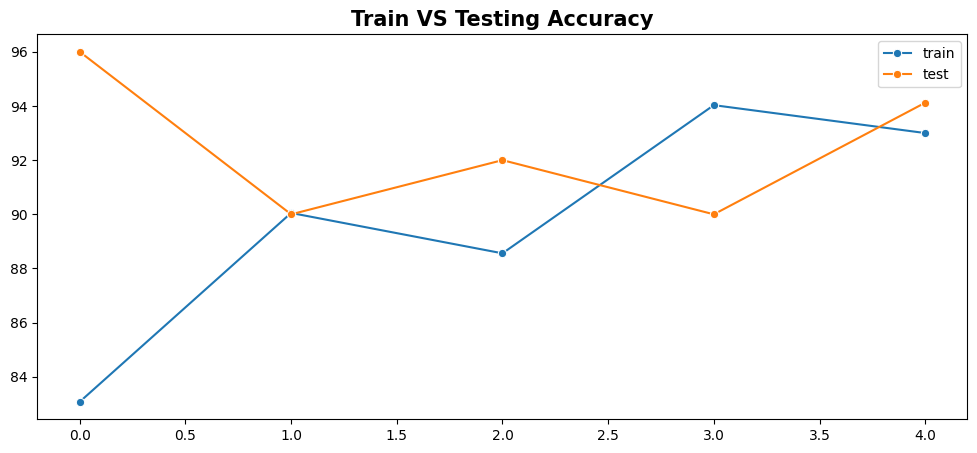

In [61]:
accuracies = []
model = DecisionTreeClassifier(max_depth=float('inf'), min_sample_split=2, min_sample_leaf=1, features=None, mode='entropy')
data = cross_validation(X, Y, model, k=5, prune='REP', alpha=alpha, train_pred=True)
avg_accuracy = np.mean(data['accuracies'])
accuracies.append(avg_accuracy)

train_accuracies = [float(round(acc, 2)) for acc in data['train_accuracies']]
test_accuracies = [float(round(acc, 2)) for acc in data['accuracies']]

sns.lineplot(train_accuracies, legend=True, marker='o', label='train', )
sns.lineplot(test_accuracies, legend=True, marker='o', label='test')
plt.title('Train VS Testing Accuracy', size=15, weight='bold')

plt.show()

##  Interpretation 🧐   
1. `Precision`: class A / predicted class A -> best cases: marketing (sometimes the majority segementation want to prioritize bigger market)
2. `Recall`: class A / actual A -> best cases: medical (we want to predict all of the real cases)
3. `F1 score`: harmony of both the precision and recall, lower f1 score meaning one of the metrices (precision / recall) is low and the other high    

In [62]:
def classification_report(y_pred, y_test):
    accuracy = np.mean(y_pred == y_test)
    report_data = []
    classes = np.unique(y_test)
    total_TP, total_FP, total_FN = 0, 0, 0

    for cls in classes:
        # predicted as positive is positive
        TP = np.sum((y_pred == cls) & (y_test == cls))
        # predicted as positive is actually negative
        FP = np.sum((y_pred == cls) & (y_test != cls))
        # predicted as negative is actually positive
        FN = np.sum((y_pred != cls) & (y_test == cls))

        # class positive among the predicted positive
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0 
        # class positive among the actual positive
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        f1_score = 2 * (precision * recall) / (precision + recall)

        data = [cls, precision, recall, f1_score]
        report_data.append(data)

        total_TP += TP 
        total_FP += FP 
        total_FN += FN

    report_df = pd.DataFrame(report_data, columns=['class', 'precision', 'recall', 'f1_score'])
    
    macro_precision = np.mean([row for row in report_df.iloc[:, 1]])
    macro_recall = np.mean([row for row in report_df.iloc[:, 2]])
    macro_f1_score = np.mean([row for row in report_df.iloc[:, 3]])

    micro_precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0.0
    micro_recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0.0
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    report_df.loc['micro avg'] = ['-', micro_precision, micro_recall, micro_f1_score]
    report_df.loc['macro avg'] = ['-', macro_precision, macro_recall, macro_f1_score]
    report_df.loc['accuracy'] = ['-', '-', '-', accuracy]

    return report_df

In [63]:
y_pred_test = model.predict(data['X_test'])
y_pred_train = model.predict(data['X_train'])
pred = np.hstack([y_pred_test, y_pred_train])
indices = np.concatenate([data['test_indices'], data['train_indices']])

In [64]:
df_clean.loc[indices, 'prediction'] = pred 

In [65]:
report_df = classification_report(df_clean['class'], df_clean['prediction'])
report_df['class'] = ['negative', 'positive', '-', '-', '-']
report_df

,class,precision,recall,f1_score
0,negative,0.871795,0.906667,0.888889
1,positive,0.959538,0.943182,0.951289
micro avg,-,0.932271,0.932271,0.932271
macro avg,-,0.915666,0.924924,0.920089
accuracy,-,-,-,0.932271


- `class negative`: the recall of negative is high, but the precision is slightly lower, this is because positive is sometimes classified as negative in the model
- `class positive:` precision and recall positive is almost the same, this is a good thing,meaning that that majority of the class is correctly classified as positive while the precision meaning there are some negative that is classified as positive
- `macro avg`: precision has lower value than recall macro avg, meaning that the class is good at predicting it self, but sometimes misscalssified itself

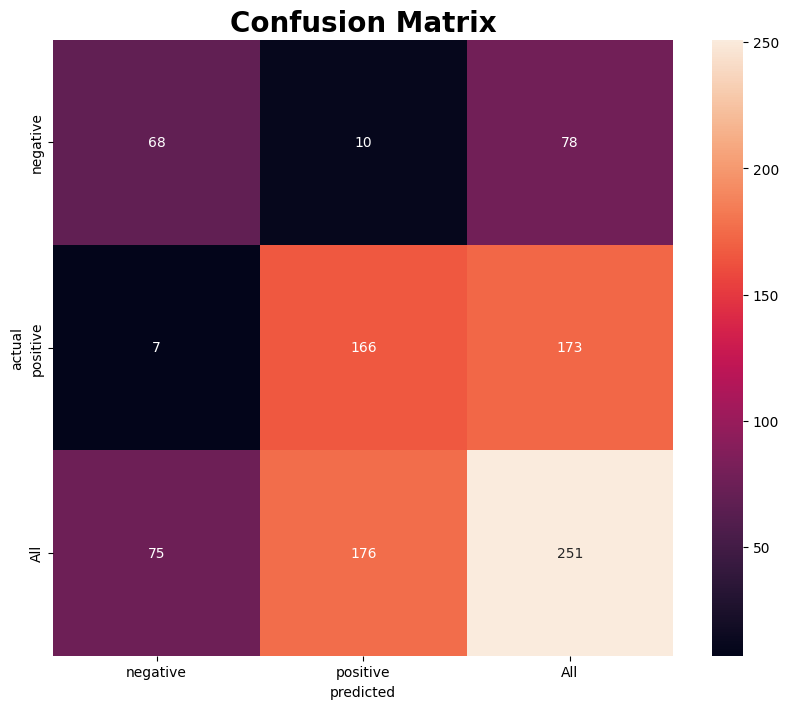

,negative,positive,All
negative,68,10,78
positive,7,166,173
All,75,176,251


In [66]:
pred_vs_actual = pd.crosstab(df_clean['class'], df_clean['prediction'], margins=True)
pred_vs_actual.columns = ['negative', 'positive', 'All']
pred_vs_actual.index = ['negative', 'positive', 'All']

plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix', size=20, weight='bold')
sns.heatmap(pred_vs_actual, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
display(pred_vs_actual)

## **Conclusion** ✅
1. The `model`, predict the postive slightly higher than the actual 
- overlapped characteristics 
- imbalanced dataset 
2. Accuracy is around 86% - 94%: this is already quite good, but for medical, the accuracy should be increases again in order to make the better prediction 
3. overall, the each class performance perform quite good, although the precision is low and recall high    
4. negative class precision is low because it predict small amount of positive but compare to its sample, its quite big 


['21' '1' '1' '1']
[21, 1, 1, 1]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_12228\2830232472.py", line 122, in predict_and_plot
    predict = self.model.make_predictions(self.new_instance)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_12228\1367186472.py", line 186, in make_predictions
    if tree.value is not None:
       ^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'value'


['21' '1' '1' '1']
[21, 1, 1, 1]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_12228\2830232472.py", line 122, in predict_and_plot
    predict = self.model.make_predictions(self.new_instance)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_12228\1367186472.py", line 186, in make_predictions
    if tree.value is not None:
       ^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'value'


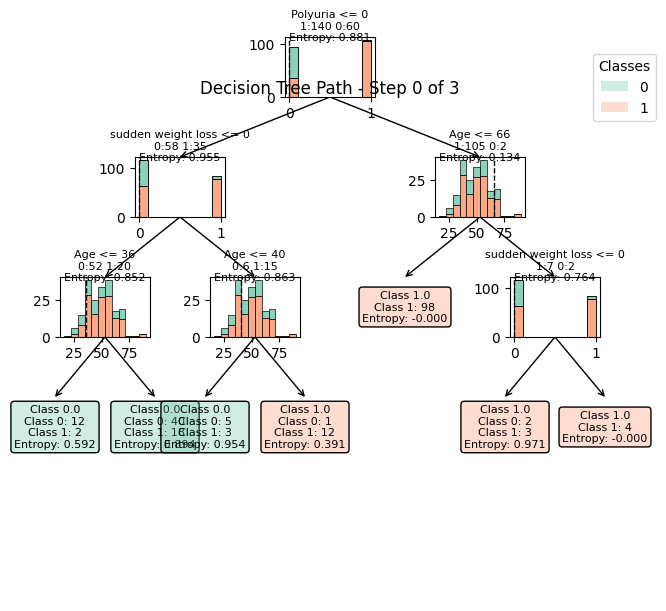

In [74]:
from tkinter.ttk import *
from tkinter import messagebox
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class TkinterApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscreen', True)
        self.root.title("Diabetes Prevent App")
        self.columns = ['patient_name', 'predict', 'ratio' 'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia', 'Obesity', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode','post_pruning' 'alpha_value']
        self.history_file = 'history.pkl'
        self.history = self.load_history()

        Style().configure('TNotebook.Tab', font=('Poppins', 20), padidng="30 10 30 10")
        self.fig, self.ax = plt.subplots(figsize=(6,6))

        self.tab_control = Notebook(root)
        self.predict_tab = Frame(self.tab_control, padding="30")
        self.history_tab = Frame(self.tab_control, padding="30")
        self.setting_tab = Frame(self.tab_control, padding="30")
        self.all_features = ['Age', 'Polyuria','Polydipsia' ,'Polyphagia']

        self.init_string_var()
        self.tab_control.add(self.predict_tab, text="Predict" )
        self.tab_control.add(self.history_tab, text="History" )
        self.tab_control.add(self.setting_tab, text="Settings" )
        self.tab_control.pack(anchor='w', fill='x')

        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
        self.train_model()

    def init_string_var(self):
        self.max_depth_var = tk.StringVar(value="3")
        self.min_sample_split_var = tk.StringVar(value="5")
        self.min_sample_leaf_var = tk.StringVar(value="1")
        self.mode_var = tk.StringVar(value="gini")
        self.alpha_value_var = tk.StringVar(value="0.0")
        self.post_pruning_var = tk.StringVar(value="REP")
    
    def input_label(self, parent,label,values=None,row=None,textvariable=None, col=None, type='entry',  desc_text=None, ):
        Label(parent, text=label, font=('Poppins', 16)).grid(row=row, column=col, sticky='w')
        if type == "entry":
            widget = Entry(parent,font=('Poppins', 15), textvariable=textvariable, width=20)
        elif type == "combobox":
            widget = Combobox(parent,font=('Poppins', 15), textvariable=textvariable, value=values, width=20 )
        else:
            widget = Checkbutton(parent, textvariable=textvariable)
        
        widget.grid(row=row+1,column=col, sticky='w')
        if desc_text:
            Label(parent, text=desc_text, font=('Poppins italic', 8)).grid(row=row+2, column=col, sticky='w')

        return widget
    def init_predict_tab(self):
        Label(self.predict_tab, text="Prevent Diabetes App with Decision Tree", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
        Label(self.predict_tab, text="Check the patient based on input", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

        self.frame_input = Frame(self.predict_tab)
        self.frame_input.grid(row=2, column=1)

        self.patient_name_entry = self.input_label(self.frame_input, label="Patient Name", col=0, row=0, desc_text="Enter name for easy find")
        self.age_entry = self.input_label(self.frame_input, label="Age", col=1, row=0, desc_text="Enter name for easy find")
        self.Polyuria_entry = self.input_label(self.frame_input, label="Polyuria", col=2,values=['Yes', 'No'],type="combobox", row=0, desc_text="Enter name for easy find")
        self.Polydipsia_entry = self.input_label(self.frame_input, label="Polydipsia",values=['Yes', 'No'],type="combobox", col=0, row=3, desc_text="Enter name for easy find")
        self.Polyphagia_entry = self.input_label(self.frame_input, label="Polyphagia", values=['Yes', 'No'], type="combobox", col=1, row=3, desc_text="Enter name for easy find")

        Button(self.frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10").grid(column=0, row=6, sticky='w')
        
        self.frame_result = Frame(self.predict_tab)
        self.frame_result.grid(row=3, column=1)


    def predict_and_plot(self):
        mapping = {
            'Yes': 1,
            'No': 0,
        }

        self.input = np.array([
            self.age_entry.get(),
            mapping.get(self.Polyuria_entry.get()),
            mapping.get(self.Polydipsia_entry.get()),
            mapping.get(self.Polyphagia_entry.get()),
        ])
        print(self.input)
        self.new_instance = [int(x) for x in self.input]
        print(self.new_instance)

        path, decisions = self.viz.get_prediction_path(self.new_instance)
        max_step = len(decisions)
        
        self.frame_viz = Frame(self.predict_tab)
        self.frame_viz.grid(row=2, column=0)

        self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
        self.canvas.get_tk_widget().grid(row=2, column=0)
      
        
        self.step = tk.Scale(self.frame_viz, from_=0, to=max_step, orient='horizontal', length=400, command=self.update_plot, resolution=1, tickinterval=1)
        self.step.grid(row=0,column=0)

        self.fig.clf()
        self.ax = self.fig.add_subplot(111)
        viz.plot_prediction_path(self.new_instance, step=0, ax=self.ax, fig=self.fig)
        self.canvas.draw()

        predict = self.model.make_predictions(self.new_instance)
        ratio = self.model.get_leaf_info(self.new_instance)
        print(predict)
        print(ratio)

        new_row = {
            'client_name' :[self.patient_name_entry.get()],
            'predict' :[predict],
            'ratio' :[ratio],
            'max_depth' :[self.max_depth_var.get()],
            'min_sample_split' :[self.min_sample_split_var.get()],
            'min_sample_leaf' :[self.min_sample_leaf_var.get()],
            'mode' :[self.mode_var.get()],
            'alpha_value' :[self.alpha_value_var.get()],
            'Age' :[self.age_entry.get()],
            'Polyuria' :[self.Polyuria_entry.get()],
            'Polydipsia' :[self.Polydipsia_entry.get()],
            'Polyphagia' :[self.Polyphagia_entry.get()],
        }

        Label(self.frame_result, text="Prediction Result: ", font=('Poppins medium', 15)).grid(row=0, column=0, sticky='w')

        col = 0
        row = 1
        for column, value in new_row.items():
            column_name = column.replace("_", " ").capitalize()
            Label(self.frame_result, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
            Label(self.frame_result, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 4:
                row += 2
                col=0

        self.input_frame = Frame(self.predict_tab)
        self.input_frame.grid(row=3, column=2)

        self.history = pd.concat([self.history, pd.DataFrame(new_row)], ignore_index=True)
        self.update_history()
        self.save_to_pickle()

    def update_plot(self, value):
        self.fig.clf()
        self.ax = self.fig.add_subplot(111)
        viz.plot_prediction_path(self.new_instance, step=self.step.get(), ax=self.ax, fig=self.fig)
        self.canvas.draw()

    
    def init_history_tab(self):
        Label(self.history_tab, text="See lastest Prediction", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
        Label(self.history_tab, text="compare the result and perfomance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

        self.history_tree = Treeview(self.history_tab, columns=['patient_name', 'predict'], show='headings')
        self.history_tree.heading('patient_name',text="Patient Name" )
        self.history_tree.heading('predict',text="Is Diabetes" )
        self.history_tree.grid(column=0, row=2)

        Button(self.history_tab, text="Compare History", command=self.compare_history, padding="30 10 30 10").grid(column=0, row=3, sticky='w')

        self.compare_frame1 = Frame(self.history_tab)
        self.compare_frame1.grid(row=4, column=0)

        self.compare_frame2 = Frame(self.history_tab)
        self.compare_frame2.grid(row=4, column=1)

    def compare_history(self):
        selected_item = self.history_tree.selection()

        if len(selected_item) != 2:
            messagebox.showerror("Error Selection", "Please select exact 2 for comparasion")

        item1 = self.history.iloc[len(selected_item[0])]
        item2 = self.history.iloc[len(selected_item[1])]

        for widget in self.compare_frame1.winfo_children():
            widget.destroy()
        for widget in self.compare_frame2.winfo_children():
            widget.destroy()
        
        col = 0
        row = 1
        for column, value in item1.items():
            column_name = column.replace("_", " ").capitalize()
            Label(self.compare_frame1, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
            Label(self.compare_frame1, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 4:
                row += 2
                col=0

        col = 0
        row = 1
        for column, value in item2.items():
            column_name = column.replace("_", " ").capitalize()
            Label(self.compare_frame2, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
            Label(self.compare_frame2, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 4:
                row += 2
                col=0

    def init_setting_tab(self):
        Label(self.setting_tab, text="Adjust and Make Best Performance", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
        Label(self.setting_tab, text="By default, setting was in best performance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')
        
        input_frame = Frame(self.setting_tab)
        input_frame.grid(row=2, column=0)

        self.max_depth_entry = self.input_label(input_frame, label="Max Depth Entry", textvariable=self.max_depth_var, row=0, col=0)
        self.min_sample_split_entry = self.input_label(input_frame, label="Min Sample Split",textvariable=self.min_sample_split_var, row=0, col=1)
        self.min_sample_leaf_entry = self.input_label(input_frame, label="Min Sample Leaf",textvariable=self.min_sample_leaf_var, row=0, col=2)

        self.alpha_value_entry = self.input_label(input_frame,textvariable=self.alpha_value_var, label="Alpha Value", row=3, col=0)
        self.mode_entry = self.input_label(input_frame, textvariable=self.mode_var, values=['gini', 'entropy'],type='combobox', label="Mode Impurity", row=3, col=1)
        self.post_pruning_entry = self.input_label(input_frame, label="Post Pruning",textvariable=self.post_pruning_var,type='combobox', values=['CCP', 'REP', False], row=3, col=2)

        Button(self.setting_tab, text="Train and update feature", command=self.train_model, padding="30 10 30 10").grid(column=0, row=5, sticky='w')


    def train_model(self):
        # try:
        messagebox.showinfo('Info', 'Train model processing')            
        
        self.frame_viz = Frame(self.predict_tab)
        self.frame_viz.grid(row=3, column=0)

        self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
        self.canvas.get_tk_widget().grid(row=2, column=0)
        for widget in self.frame_viz.winfo_children():
            if self.canvas.get_tk_widget() == widget:
                widget.destroy()
        
        X = df_clean[self.all_features].values
        Y = df_clean['class'].values

        # self.model = DecisionTreeClassifier(max_depth=int(self.max_depth_var.get()), min_sample_split=int(self.min_sample_split_var.get()), min_sample_leaf=int(self.min_sample_leaf_var.get()), features=[], mode=self.mode_var.get())
        self.model = DecisionTreeClassifier(max_depth=3, min_sample_split=5, min_sample_leaf=1, features=None, mode='entropy')
        data = cross_validation(X, Y, self.model, k=5, prune=False, alpha=0.0)

        data_df = pd.DataFrame(data['X_train'], columns=self.all_features)
        data_df['class'] = data['y_train'].flatten()

        self.viz = TreeVisualization(self.model, data_df, target_col='class', feature_names=self.all_features)
        self.viz.plot_prediction_path(fig=self.fig, ax=self.ax)
        self.ax = self.fig.add_subplot(111)
        self.canvas.draw()

        clf_report_frame = Frame(self.setting_tab)
        clf_report_frame.grid(row=5, column=0)

        for widget in clf_report_frame.winfo_children():
            widget.destroy()

        Label(clf_report_frame, text="Classification Report", font=('Poppins', 15)).grid(row=0, column=0, sticky='w')
        clf_report = classification_report(data['y_pred'], data['y_test'])
        
        col= 0
        row = 1
        for column, value in clf_report.items():
            column_name = column.replace("_", " ").capitalize()
            Label(clf_report_frame, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
            Label(clf_report_frame, text=str(value), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
            col += 1
            if col == 5:
                row += 2
                col = 0

        messagebox.showinfo('Success', 'Model has successsfully updated')      
        # except Exception as e:
        #     messagebox.showinfo('Error Update Train', f'Error {e}')      


    def load_history(self):
        if os.path.exists(self.history_file):
            self.history.to_pickle(self.history_file)
        else:
            new_row = pd.DataFrame(columns=self.columns)
            return new_row
        
    def save_to_pickle(self):
        self.history.to_pickle(self.history_file)

    def update_history(self):
        for item in self.history_tree.get_children():
            self.history_tree.delete(item)
        for i, row in enumerate(self.history):
            value = tuple(row[col] for col in self.columns)
            self.history_tree.insert('', 'end', values=value)

if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()

In [68]:
# from tkinter.ttk import *
# from tkinter import messagebox
# import tkinter as tk
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# class TkinterApp:
#     def __init__(self, root):
#         self.root = root
#         self.root.attributes('-fullscreen', True)
#         self.root.title("Diabetes Prevent App")
#         self.columns = ['patient_name', 'predict', 'ratio' 'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia', 'Obesity', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode','post_pruning' 'alpha_value']
#         self.history_file = 'history.pkl'
#         self.history = self.load_history()

#         Style().configure('TNotebook.Tab', font=('Poppins', 34), padidng="30 10 30 10")
#         self.fig, self.ax = plt.subplots(figsize=(6,6))

#         self.tab_control = Notebook(root)
#         self.predict_tab = Frame(self.tab_control, padding="30")
#         self.history_tab = Frame(self.tab_control, padding="30")
#         self.setting_tab = Frame(self.tab_control, padding="30")
#         self.all_features = ['Age', 'Polyuria','Polydipsia' ,'Polyphagia']

#         self.init_string_var()
#         self.tab_control.add(self.predict_tab, text="Predict" )
#         self.tab_control.add(self.history_tab, text="History" )
#         self.tab_control.add(self.setting_tab, text="Settings" )
#         self.tab_control.pack(anchor='w', fill='x')

#         self.init_predict_tab()
#         self.init_history_tab()
#         self.init_setting_tab()
#         self.train_model()

#     def init_string_var(self):
#         self.max_depth_var = tk.StringVar(value="3")
#         self.min_sample_split_var = tk.StringVar(value="5")
#         self.min_sample_leaf_var = tk.StringVar(value="1")
#         self.mode_var = tk.StringVar(value="gini")
#         self.alpha_value_var = tk.StringVar(value="0.0")
#         self.post_pruning_var = tk.StringVar(value="REP")
    
#     def input_label(self, parent,label,values=None,row=None,textvariable=None, col=None, type='entry',  desc_text=None, ):
#         Label(parent, text=label, font=('Poppins', 16)).grid(row=row, column=col, sticky='w')
#         if type == "entry":
#             widget = Entry(parent,font=('Poppins', 15), textvariable=textvariable, width=20)
#         elif type == "combobox":
#             widget = Combobox(parent,font=('Poppins', 15), textvariable=textvariable, value=values, width=20 )
#         else:
#             widget = Checkbutton(parent, textvariable=textvariable)
        
#         widget.grid(row=row+1,column=col, sticky='w')
#         if desc_text:
#             Label(parent, text=desc_text, font=('Poppins italic', 8)).grid(row=row+2, column=col, sticky='w')
    
#     def init_predict_tab(self):
#         Label(self.predict_tab, text="Prevent Diabetes App with Decision Tree", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
#         Label(self.predict_tab, text="Check the patient based on input", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

#         self.frame_input = Frame(self.predict_tab)
#         self.frame_input.grid(row=2, column=1)

#         self.patient_name_entry = self.input_label(self.frame_input, label="Patient Name", col=0, row=0, desc_text="Enter name for easy find")
#         self.age_entry = self.input_label(self.frame_input, label="Age", col=1, row=0, desc_text="Enter name for easy find")
#         self.Polyuria_entry = self.input_label(self.frame_input, label="Polyuria", col=2,values=[True, False],type="combobox", row=0, desc_text="Enter name for easy find")
#         self.Polydipsia_entry = self.input_label(self.frame_input, label="Polydipsia",values=[True, False],type="combobox", col=0, row=3, desc_text="Enter name for easy find")
#         self.Polyphagia_entry = self.input_label(self.frame_input, label="Polyphagia", values=[True, False], type="combobox", col=1, row=3, desc_text="Enter name for easy find")

#         Button(self.frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10").grid(column=0, row=6, sticky='w')
        
#         self.frame_result = Frame(self.predict_tab)
#         self.frame_result.grid(row=3, column=1)


#     def predict_and_plot(self):

#         path, decisions = self.viz.get_prediction_path(self.new_instance, step=self.step.get(), fig=self.fig, ax=self.ax)
#         max_step = len(decisions)
#         self.new_instance = {
#             'Age' :[self.age_entry.get()],
#             'Polyuria' :[self.Polyuria_entry.get()],
#             'Polydipsia' :[self.Polydipsia_entry.get()],
#             'Polyphagia' :[self.Polyphagia_entry.get()],}
        
#         if getattr(self, 'frame_viz'):
#             self.frame_viz = Frame(self.predict_tab)
#             self.frame_viz.grid(row=2, column=0)

#             self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
#             self.canvas.get_tk_widget().grid(row=2, column=0)
#         else:
#             for widget in self.frame_viz.winfo_children():
#                 if self.canvas.get_tk_widget() == widget:
#                     widget.destroy()
        
#         self.step = tk.Scale(self.frame_viz, from_=0, to=max_step, orient='horizontal', length=400, resolution=1, tickinterval=1)
#         self.step.grid(row=0,column=0)

#         self.fig.clf()
#         self.ax = self.fig.add_subplot(111)
#         viz.plot_prediction_path(ax=self.ax, fig=self.fig)
#         self.canvas.draw()

#         for widget in self.frame_result.winfo_children():
#             widget.destroy()
        
#         predict = self.model.make_prediction(self.new_instance)
#         ratio = self.model.get_leaf_node(self.new_instance)


#         new_row = {
#             'client_name' :[self.patient_name_entry.get()],
#             'predict' :[predict],
#             'ratio' :[ratio],
#             'max_depth' :[self.max_depth_var.get()],
#             'min_sample_split' :[self.min_sample_split_var.get()],
#             'min_sample_leaf' :[self.min_sample_leaf_var.get()],
#             'selected_features' :[self.selected_features.get()],
#             'mode' :[self.mode_var.get()],
#             'alpha_value' :[self.alpha_value_var.get()],
#             'Age' :[self.age_entry.get()],
#             'Polyuria' :[self.Polyuria_entry.get()],
#             'Polydipsia' :[self.Polydipsia_entry.get()],
#             'Polyphagia' :[self.Polyphagia_entry.get()],
#         }

#         Label(self.frame_result, text="Prediction Result: ", font=('Poppins medium', 15)).grid(row=0, column=0, sticky='w')

#         col = 0
#         row = 1
#         for column, value in new_row.items():
#             column_name = column.replace("_", " ").capitalize()
#             Label(self.frame_result, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#             Label(self.frame_result, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#             col += 1
#             if col == 4:
#                 row += 2
#                 col=0

#         self.input_frame = Frame(self.predict_tab)
#         self.input_frame.grid(row=3, column=2)

#         self.history = pd.concat([self.history, pd.DataFrame(new_row)], ignore_index=True)
#         self.update_history()
#         self.save_to_pickle()

#     def update_plot(self):
#         self.fig.clf()
#         self.ax = self.fig.add_subplot(111)
#         viz.plot_prediction_path(self.new_instance, step=self.step.get(), ax=self.ax, fig=self.fig)
#         self.canvas.draw()

    
#     def init_history_tab(self):
#         Label(self.history_tab, text="See lastest Prediction", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
#         Label(self.history_tab, text="compare the result and perfomance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

#         self.history_tree = Treeview(self.history_tab, columns=['patient_name', 'predict'], show='headings')
#         self.history_tree.heading('patient_name',text="Patient Name" )
#         self.history_tree.heading('predict',text="Is Diabetes" )
#         self.history_tree.grid(column=0, row=2)

#         Button(self.history_tab, text="Compare History", command=self.compare_history, padding="30 10 30 10").grid(column=0, row=3, sticky='w')

#         self.compare_frame1 = Frame(self.history_tab)
#         self.compare_frame1.grid(row=4, column=0)

#         self.compare_frame2 = Frame(self.history_tab)
#         self.compare_frame2.grid(row=4, column=1)

#     def compare_history(self):
#         selected_item = self.history_tree.selection()

#         if len(selected_item) != 2:
#             messagebox.showerror("Error Selection", "Please select exact 2 for comparasion")

#         item1 = self.history.iloc[len(selected_item[0])]
#         item2 = self.history.iloc[len(selected_item[1])]

#         for widget in self.compare_frame1.winfo_children():
#             widget.destroy()
#         for widget in self.compare_frame2.winfo_children():
#             widget.destroy()
        
#         col = 0
#         row = 1
#         for column, value in item1.items():
#             column_name = column.replace("_", " ").capitalize()
#             Label(self.compare_frame1, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#             Label(self.compare_frame1, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#             col += 1
#             if col == 4:
#                 row += 2
#                 col=0

#         col = 0
#         row = 1
#         for column, value in item2.items():
#             column_name = column.replace("_", " ").capitalize()
#             Label(self.compare_frame2, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#             Label(self.compare_frame2, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#             col += 1
#             if col == 4:
#                 row += 2
#                 col=0

#     def init_setting_tab(self):
#         Label(self.setting_tab, text="Adjust and Make Best Performance", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
#         Label(self.setting_tab, text="By default, setting was in best performance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')
        
#         input_frame = Frame(self.setting_tab)
#         input_frame.grid(row=2, column=0)

#         self.max_depth_entry = self.input_label(input_frame, label="Max Depth Entry", textvariable=self.max_depth_var, row=0, col=0)
#         self.min_sample_split_entry = self.input_label(input_frame, label="Min Sample Split",textvariable=self.min_sample_split_var, row=0, col=1)
#         self.min_sample_leaf_entry = self.input_label(input_frame, label="Min Sample Leaf",textvariable=self.min_sample_leaf_var, row=0, col=2)

#         self.alpha_value_entry = self.input_label(input_frame,textvariable=self.alpha_value_var, label="Alpha Value", row=3, col=0)
#         self.mode_entry = self.input_label(input_frame, textvariable=self.mode_var, values=['gini', 'entropy'],type='combobox', label="Mode Impurity", row=3, col=1)
#         self.post_pruning_entry = self.input_label(input_frame, label="Post Pruning",textvariable=self.post_pruning_var,type='combobox', values=['CCP', 'REP', False], row=3, col=2)

#         Button(self.setting_tab, text="Train and update feature", command=self.train_model, padding="30 10 30 10").grid(column=0, row=5, sticky='w')


#     def train_model(self):
#         try:
#             messagebox.showinfo('Info', 'Train model processing')            
            
#             self.frame_viz = Frame(self.predict_tab)
#             self.frame_viz.grid(row=3, column=0)

#             self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
#             self.canvas.get_tk_widget().grid(row=2, column=0)
#             for widget in self.frame_viz.winfo_children():
#                 if self.canvas.get_tk_widget() == widget:
#                     widget.destroy()
            
#             X = df_clean[self.all_features].values
#             Y = df_clean['class'].values

#             self.model = DecisionTreeClassifier(max_depth=int(self.max_depth_var.get()), min_sample_split=int(self.min_sample_split_var.get()), min_sample_leaf=int(self.min_sample_leaf_var.get()), features=[], mode=self.mode_var.get())
            
#             data = cross_validation(X, Y, self.model, k=5, prune=self.post_pruning_var.get(), alpha=float(self.alpha_value_var.get()))

#             data_df = pd.DataFrame(data['X_train'], columns=self.all_features)
#             data_df['class'] = data['y_train'].flatten()

#             self.viz = TreeVisualization(self.model, data_df, target_col='class', feature_names=self.all_features)
#             self.viz.plot_prediction_path(fig=self.fig, ax=self.ax)
#             self.ax = self.fig.add_subplot(111)
#             self.canvas.draw()

#             clf_report_frame = Frame(self.setting_tab)
#             clf_report_frame.grid(row=5, column=0)

#             for widget in clf_report_frame.winfo_children():
#                 widget.destroy()

#             Label(clf_report_frame, text="Classification Report", font=('Poppins', 15)).grid(row=0, column=0, sticky='w')
#             clf_report = classification_report(data['y_pred'], data['y_test'])
            
#             col= 0
#             row = 1
#             for column, value in clf_report.items():
#                 column_name = column.replace("_", " ").capitalize()
#                 Label(clf_report_frame, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#                 Label(clf_report_frame, text=str(value), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#                 col += 1
#                 if col == 5:
#                     row += 2
#                     col = 0

#             messagebox.showinfo('Success', 'Model has successsfully updated')      
#         except Exception as e:
#             messagebox.showinfo('Error Update Train', f'Error {e}')      


#     def load_history(self):
#         if os.path.exists(self.history_file):
#             self.history.to_pickle(self.history_file)
#         else:
#             new_row = pd.DataFrame(columns=self.columns)
#             return new_row
        
#     def save_to_pickle(self):
#         self.history.to_pickle(self.history_file)

#     def update_history(self):
#         for item in self.history_tree.get_children():
#             self.history_tree.delete(item)
#         for i, row in enumerate(self.history):
#             value = tuple(row[col] for col in self.columns)
#             self.history_tree.insert('', 'end', values=value)

            
# if __name__ == "__main__":
#     root = tk.Tk()
#     app = TkinterApp(root)
#     root.mainloop()

In [69]:
# from tkinter.ttk import *
# from tkinter import messagebox
# import tkinter as tk
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# class TkinterApp:
#     def __init__(self, root):
#         self.root = root
#         self.root.attributes('-fullscreen', True)
#         self.root.title("Diabetes Prevent App")
#         self.columns = ['patient_name', 'predict', 'ratio' 'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia', 'Obesity', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode','post_pruning' 'alpha_value']
#         self.history_file = 'history.pkl'
#         self.history = self.load_history()

#         Style().configure('TNotebook.Tab', font=('Poppins', 34), padidng="30 10 30 10")
#         self.fig, self.ax = plt.subplots(figsize=(6,6))

#         self.tab_control = Notebook(root)
#         self.predict_tab = Frame(self.tab_control, padding="30")
#         self.history_tab = Frame(self.tab_control, padding="30")
#         self.setting_tab = Frame(self.tab_control, padding="30")

#         self.all_features = ['Polyuria', 'Polydipsia','sudden weight loss' ,'Age', 'Gender', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia', 'Obesity']
#         self.selected_features = self.all_features[:3]

#         self.init_string_var()
#         self.tab_control.add(self.predict_tab, text="Predict" )
#         self.tab_control.add(self.history_tab, text="History" )
#         self.tab_control.add(self.setting_tab, text="Settings" )
#         self.tab_control.pack(anchor='w', fill='x')

#         self.init_predict_tab()
#         self.init_history_tab()
#         self.init_setting_tab()
#         self.train_model()

#     def init_string_var(self):
#         self.max_depth_var = tk.StringVar(value="4")
#         self.min_sample_split_var = tk.StringVar(value="6")
#         self.min_sample_leaf_var = tk.StringVar(value="4")
#         self.mode_var = tk.StringVar(value="4")
#         self.alpha_value_var = tk.StringVar(value="0.0")
#         self.post_pruning_var = tk.StringVar(value="REP")

#         self.features_var = tk.StringVar(value=", ".join(self.selected_features))
    
#     def input_label(self, parent,label,values=None,row=None,textvariable=None, col=None, type='entry',  desc_text=None, ):
#         Label(parent, text=label, font=('Poppins', 16)).grid(row=row, column=col, sticky='w')
#         if type == "entry":
#             widget = Entry(parent,font=('Poppins', 15), textvariable=textvariable, width=20)
#         elif type == "combobox":
#             widget = Combobox(parent,font=('Poppins', 15), textvariable=textvariable, value=values, width=20 )
#         else:
#             widget = Checkbutton(parent, textvariable=textvariable,  )
        
#         widget.grid(row=row+1,column=col, sticky='w')
#         if desc_text:
#             Label(parent, text=desc_text, font=('Poppins italic', 8)).grid(row=row+2, column=col, sticky='w')
    
#     def init_predict_tab(self):
#         Label(self.predict_tab, text="Prevent Diabetes App with Decision Tree", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
#         Label(self.predict_tab, text="Check the patient based on input", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

#         self.frame_input = Frame(self.predict_tab)
#         self.frame_input.grid(row=2, column=1)

#         self.features_entries = {}
#         self.create_input_fields()

#     def create_input_fields(self):
#         for widget in self.frame_input.winfo_children():
#             widget.destroy()

#         self.patient_name_entry = self.input_label(self.frame_input, label="Patient Name", col=0, row=0, desc_text="Enter name for easy find")

#         col = 0
#         row = 3
#         max_row = row
#         for feature in self.selected_features:
#             self.features_entries[feature] =  self.input_label(self.frame_input, label=feature.replace("_"," ").title(), col=col, row=row, desc_text=f"choose {feature}")
#             col += 1
#             if col == 4:
#                 col = 0
#                 row += 3
#                 max_row = row

#         Button(self.frame_input, text="Go Predict", command=self.predict_and_plot, padding="30 10 30 10").grid(column=0, row=max_row+3, sticky='w')
        
#         self.frame_result = Frame(self.predict_tab)
#         self.frame_result.grid(row=3, column=1)

#     def predict_and_plot(self):
#         # try:
#         values = []
#         for feature in self.selected_features:
#             mapping = {
#                 True: 1,
#                 False:0,
#             }
#             value = mapping[feature][self.features_entries[feature].get()]
#             values.append(value)


#         full_feature_array = np.zeros(len(self.all_features))
#         for i, value in enumerate(self.all_features):
#             if value in self.selected_features:
#                 idx = self.selected_features.index(value)
#                 full_feature_array[i] = values[idx]

#         self.new_instance = full_feature_array
#         path, decisions = self.viz.get_prediction_path(self.new_instance, step=self.step.get(), fig=self.fig, ax=self.ax)
#         max_step = len(decisions)


#         if getattr(self, 'frame_viz'):
#             self.frame_viz = Frame(self.predict_tab)
#             self.frame_viz.grid(row=2, column=0)

#             self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
#             self.canvas.get_tk_widget().grid(row=2, column=0)
#         else:
#             for widget in self.frame_viz.winfo_children():
#                 if self.canvas.get_tk_widget() == widget:
#                     widget.destroy()
        
#         self.step = tk.Scale(self.frame_viz, from_=0, to=max_step, orient='horizontal', command=self.update_plot, length=400, resolution=1, tickinterval=1)
#         self.step.grid(row=0,column=0)

#         self.fig.clf()
#         self.ax = self.fig.add_subplot(111)
#         viz.plot_prediction_path(ax=self.ax, fig=self.fig)
#         self.canvas.draw()

#         for widget in self.frame_result.winfo_children():
#             widget.destroy()
        
#         predict = self.model.make_prediction(self.new_instance)
#         ratio = self.model.get_leaf_node(self.new_instance)

#         for i, value in enumerate(self.all_features):
#             if value in self.selected_features:
#                 new_row[value] = full_feature_array[i]

#         new_row = {
#             'client_name' :[self.patient_name_entry.get()],
#             'predict' :[predict],
#             'ratio' :[ratio],
#             'max_depth' :[self.max_depth_var.get()],
#             'min_sample_split' :[self.min_sample_split_var.get()],
#             'min_sample_leaf' :[self.min_sample_leaf_var.get()],
#             'selected_features' :[self.selected_features.get()],
#             'mode' :[self.mode_var.get()],
#             'alpha_value' :[self.alpha_value_var.get()],
#         }


#         Label(self.frame_result, text="Prediction Result: ", font=('Poppins medium', 15)).grid(row=0, column=0, sticky='w')

#         col = 0
#         row = 1
#         for column, value in new_row.items():
#             if column in self.selected_features or column in [ 'patient_name', 'predict', 'ratio', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode', 'alpha_value']:
#                 column_name = column.replace("_", " ").capitalize()
#                 Label(self.frame_result, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#                 Label(self.frame_result, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#             col += 1
#             if col == 4:
#                 row += 2
#                 col=0

#         self.input_frame = Frame(self.predict_tab)
#         self.input_frame.grid(row=3, column=2)

#         self.history = pd.concat([self.history, pd.DataFrame(new_row)], ignore_index=True)
#         self.update_history()
#         self.save_to_pickle()

#         # except Exception as e:
#         #     messagebox.showerror("Error Predict and Plot", f"Error: {e}")

#     def update_plot(self):
#         self.fig.clf()
#         self.ax = self.fig.add_subplot(111)
#         viz.plot_prediction_path(self.new_instance, step=self.step.get(), ax=self.ax, fig=self.fig)
#         self.canvas.draw()

    
#     def init_history_tab(self):
#         Label(self.history_tab, text="See lastest Prediction", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
#         Label(self.history_tab, text="compare the result and perfomance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')

#         self.history_tree = Treeview(self.history_tab, columns=['patient_name', 'predict'], show='headings')
#         self.history_tree.heading('patient_name',text="Patient Name" )
#         self.history_tree.heading('predict',text="Is Diabetes" )
#         self.history_tree.grid(column=0, row=2)

#         Button(self.history_tab, text="Compare History", command=self.compare_history, padding="30 10 30 10").grid(column=0, row=3, sticky='w')

#         self.compare_frame1 = Frame(self.history_tab)
#         self.compare_frame1.grid(row=4, column=0)

#         self.compare_frame2 = Frame(self.history_tab)
#         self.compare_frame2.grid(row=4, column=1)

#     def compare_history(self):
#         selected_item = self.history_tree.selection()

#         if len(selected_item) != 2:
#             messagebox.showerror("Error Selection", "Please select exact 2 for comparasion")

#         item1 = self.history.iloc[len(selected_item[0])]
#         item2 = self.history.iloc[len(selected_item[1])]

#         for widget in self.compare_frame1.winfo_children():
#             widget.destroy()
#         for widget in self.compare_frame2.winfo_children():
#             widget.destroy()
        
#         col = 0
#         row = 1
#         for column, value in item1.items():
#             if column in self.frame_input or column in ['patient_name', 'predict', 'ratio', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode', 'alpha_value']:
#                 column_name = column.replace("_", " ").capitalize()
#                 Label(self.compare_frame1, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#                 Label(self.compare_frame1, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#             col += 1
#             if col == 4:
#                 row += 2
#                 col=0

#         col = 0
#         row = 1
#         for column, value in item2.items():
#             if column in self.frame_input or column in ['patient_name', 'predict', 'ratio', 'max_depth', 'min_sample_split',  'min_sample_leaf', 'selected_features', 'mode', 'alpha_value']:
#                 column_name = column.replace("_", " ").capitalize()
#                 Label(self.compare_frame2, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#                 Label(self.compare_frame2, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#             col += 1
#             if col == 4:
#                 row += 2
#                 col=0

#     def init_setting_tab(self):
#         Label(self.setting_tab, text="Adjust and Make Best Performance", font=('Poppins bold', 25)).grid(row=0, column=0, sticky='w')
#         Label(self.setting_tab, text="By default, setting was in best performance", font=('Poppins', 15)).grid(row=0, column=1, sticky='w')
        
#         input_frame = Frame(self.setting_tab)
#         input_frame.grid(row=2, column=0)

#         self.max_depth_entry = self.input_label(input_frame, label="Max Depth Entry", textvariable=self.max_depth_var, row=0, col=0)
#         self.min_sample_split_entry = self.input_label(input_frame, label="Min Sample Split",textvariable=self.min_sample_split_var, row=0, col=1)
#         self.min_sample_leaf_entry = self.input_label(input_frame, label="Min Sample Leaf",textvariable=self.min_sample_leaf_var, row=0, col=2)

#         self.alpha_value_entry = self.input_label(input_frame,textvariable=self.alpha_value_var, label="Alpha Value", row=3, col=0)
#         self.mode_entry = self.input_label(input_frame, textvariable=self.mode_var, type='combobox', values=['gini', 'entropy'], label="Mode Impurity", row=3, col=1)
#         self.post_pruning_entry = self.input_label(input_frame, label="Post Pruning",type='combobox',values=['CCP', 'REP', False], row=3, col=2)
        
#         listbox_frame = Frame(self.setting_tab)
#         listbox_frame.grid(row=4, column=1)
        
#         Label(listbox_frame, text="Feature Selection", font=('Poppins', 15)).grid(row=0, column=0, sticky='w')
#         self.listbox_feature = tk.Listbox(listbox_frame,listvariable=self.all_features,selectmode='multiple', width=20, height=len(self.all_features))
#         self.listbox_feature.grid(row=1, column=0, sticky='w')

#         for i, feature in enumerate(self.all_features):
#             if feature in self.selected_features:
#                 pass

#         Label(listbox_frame, text="Current Selection:", font=('Poppins medium', 10)).grid(row=2, column=0, sticky='w')
#         Label(listbox_frame, text=self.features_var.get(), font=('Poppins', 8)).grid(row=3, column=0, sticky='w')

#         Button(listbox_frame, text="Train and update feature", command=self.update_model_and_feature, padding="30 10 30 10").grid(column=0, row=3, sticky='w')

#     def update_model_and_feature(self):
#         selection_indices = self.listbox_feature.curselection()

#         if selection_indices:
#             messagebox.showerror("Error Selection", "Please select exact 2 for comparasion")

#         self.selected_features = [self.all_features[i] for i in selection_indices]
#         self.features_var.set(', '.join(self.selected_features))
        
#         self.create_input_fields()
#         self.train_model()

#     def train_model(self):
#         try:

#             messagebox.showinfo('Info', 'Train model processing')            
            
#             self.frame_viz = Frame(self.predict_tab)
#             self.frame_viz.grid(row=3, column=0)

#             self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
#             self.canvas.get_tk_widget().grid(row=2, column=0)
#             for widget in self.frame_viz.winfo_children():
#                 if self.canvas.get_tk_widget() == widget:
#                     widget.destroy()
            
#             feature_indices = [self.all_features.index(feature) for feature in self.selected_features]

#             X_selected = df_clean[self.selected_features].values
#             Y = df_clean['class'].values

#             self.model = DecisionTreeClassifier(max_depth=int(self.max_depth_var.get()), min_sample_split=int(self.min_sample_split_var.get()), min_sample_leaf=int(self.min_sample_leaf_var.get()), features=feature_indices, mode=self.mode_var.get())
            
#             data = cross_validation(X_selected, Y, self.model, k=5, prune=self.post_pruning_var.get(), alpha=float(self.alpha_value_var.get()))

#             data_df = pd.DataFrame(data['X_train'], columns=self.selected_features)
#             data_df['class'] = data['y_train'].flatten()

#             self.viz = TreeVisualization(self.model, data_df, target_col='class', feature_names=self.selected_features)
#             self.viz.plot_prediction_path(fig=self.fig, ax=self.ax)
#             self.ax = self.fig.add_subplot(111)
#             self.canvas.draw()


#             clf_report_frame = Frame(self.setting_tab)
#             clf_report_frame.grid(row=5, column=0)

#             for widget in clf_report_frame.winfo_children():
#                 widget.destroy()

#             Label(clf_report_frame, text="Classification Report", font=('Poppins', 15)).grid(row=0, column=0, sticky='w')
#             clf_report = classification_report(data['y_pred'], data['y_test'])
            
#             col= 0
#             row = 1
#             for column, value in clf_report.items():
#                 column_name = column.replace("_", " ").capitalize()
#                 Label(clf_report_frame, text=column_name, font=('Poppins', 10)).grid(row=row, column=col, sticky='w')
#                 Label(clf_report_frame, text=str(value[0]), font=('Poppins medium', 15)).grid(row=row+1, column=col, sticky='w')
#                 col += 1
#                 if col == 5:
#                     row += 2
#                     col = 0

#             messagebox.showinfo('Success', 'Model has successsfully updated')      
#         except Exception as e:
#             messagebox.showinfo('Error Update Train', f'Error {e}')      


#     def load_history(self):
#         if os.path.exists(self.history_file):
#             self.history.to_pickle(self.history_file)
#         else:
#             new_row = pd.DataFrame(columns=self.columns)
#             return new_row
        
#     def save_to_pickle(self):
#         self.history.to_pickle(self.history_file)

#     def update_history(self):
#         for item in self.history_tree.get_children():
#             self.history_tree.delete(item)
#         for i, row in enumerate(self.history):
#             value = tuple(row[col] for col in self.columns)
#             self.history_tree.insert('', 'end', values=value)

            
# if __name__ == "__main__":
#     root = tk.Tk()
#     app = TkinterApp(root)
#     root.mainloop()